<a href="https://colab.research.google.com/github/piyush1856/Business-Case-Aerofit---Descriptive-Statistics-Probability./blob/main/Business_Case_Aerofit_Descriptive_Statistics_%26_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

### **Background**
Aerofit is a renowned brand in the fitness equipment industry, offering a diverse range of products including treadmills, exercise bikes, gym equipment, and various fitness accessories. The company's mission is to cater to the fitness needs of all segments of the population, from beginners to advanced fitness enthusiasts.

### **Business Problem**
In an effort to better understand its customer base and optimize its product recommendations, the market research team at Aerofit seeks to identify the characteristics of the target audience for each of their treadmill models—KP281, KP481, and KP781. Specifically, the team wants to investigate whether there are significant differences in customer demographics, preferences, and usage patterns across these products. This analysis will provide valuable insights into the types of customers most likely to purchase each model and inform the company’s marketing and sales strategies.

### **Objective**
The goal of this case study is to provide a comprehensive analysis of Aerofit's treadmill customers to better understand the unique characteristics and preferences associated with each treadmill model: KP281, KP481, and KP781. Specifically, this analysis aims to:
- **Customer Segmentation**: Identify distinct customer segments based on demographic and behavioral factors such as age, income, fitness level, and treadmill usage patterns.
- **Product Profiling**: Develop detailed profiles for each treadmill model by analyzing the demographic characteristics and usage patterns of customers who purchase them.
- **Probability Analysis**: Calculate marginal and conditional probabilities to determine the likelihood of a customer purchasing a specific treadmill model based on their attributes.
- **Correlation Analysis**: Investigate the relationships between key variables such as age, income, fitness level, and product choice to uncover any significant patterns or associations.
- **Business Insights**: Provide actionable insights that can guide Aerofit's marketing strategies, sales efforts, and product development to better meet the needs of their target customers.


### **Dataset Description**
The dataset includes the following features for each customer:
- **Product Purchased**: The treadmill model purchased (KP281, KP481, or KP781).
- **Age**: The customer's age in years.
- **Gender**: The customer's gender (Male/Female).
- **Education**: The number of years of education completed.
- **Marital Status**: Whether the customer is single or partnered.
- **Usage**: The average number of times per week the customer plans to use the treadmill.
- **Income**: The customer's annual income in USD.
- **Fitness Level**: The customer's self-rated fitness level on a scale of 1 (poor) to 5 (excellent).
- **Miles**: The average number of miles the customer expects to walk or run each week.

### **Approach**
The analysis will be conducted in the following structured steps:

1. **Data Exploration and Preparation**:
   - **Data Structure & Summary**: Begin by importing the dataset and examining its structure, including the number of rows and columns, data types, and summary statistics.
   - **Missing Value Detection**: Identify and handle any missing data through appropriate imputation techniques or by removing incomplete records if necessary.
   - **Outlier Detection**: Use boxplots and statistical methods to detect outliers in continuous variables and decide whether to remove or adjust them.

2. **Descriptive Statistics**:
   - **Univariate Analysis**: Perform an analysis of each individual variable to understand its distribution, central tendency, and variability. This includes generating histograms, boxplots, and summary statistics.
   - **Bivariate Analysis**: Examine relationships between pairs of variables, particularly focusing on how demographic and behavioral factors influence the product purchased. This will involve using scatter plots, boxplots, and correlation analysis.

3. **Probability Analysis**:
   - **Marginal Probability**: Calculate the overall probability of purchasing each treadmill model (KP281, KP481, KP781) across the entire customer base.
   - **Conditional Probability**: Determine the probability of purchasing a specific treadmill model given certain customer characteristics (e.g., gender, marital status, income). This will be done using contingency tables and cross-tabulation.

4. **Correlation and Multivariate Analysis**:
   - **Correlation Matrix**: Generate a correlation matrix to assess the strength and direction of relationships between multiple variables, and visualize these relationships using a heatmap.
   - **Pairplots and Regression Analysis**: Further explore significant correlations and potential predictors of treadmill choice by using pairplots and simple regression models.

5. **Customer Profiling**:
   - **Segmentation**: Group customers into segments based on key attributes such as age, income, fitness level, and treadmill usage.
   - **Product Profiles**: Create detailed profiles for each treadmill model, highlighting the typical demographic and behavioral characteristics of customers who purchase each product.

6. **Actionable Recommendations**:
   - Based on the insights from the analysis, provide specific, actionable recommendations for Aerofit. These may include targeted marketing strategies, product development suggestions, and sales tactics tailored to the identified customer segments and profiles.


## **Import libraries and load dataset**

In [186]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Display settings for better readability of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set the style for plots
sns.set(style="whitegrid")

# Warnings
import warnings
warnings.filterwarnings("ignore")


In [187]:
# Load the dataset
df = pd.read_csv('aerofit_treadmill.csv')

# Display the random few rows of the dataset to verify it's loaded correctly
df.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
111,KP481,27,Male,14,Single,4,2,45480,53
127,KP481,34,Male,15,Single,3,3,67083,85
89,KP481,23,Female,16,Single,3,3,45480,95
137,KP481,40,Male,16,Partnered,3,3,64809,95
98,KP481,25,Female,14,Single,3,4,43206,127


## **Shape**

In [188]:
# Shape of data
df.shape

(180, 9)

#### **Inference :**

- The dataset comprises 180 observations (rows) and 9 features (columns), providing a substantial sample size for analysis.

## **Data Types**

In [189]:
# information about datatype of dataset
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


###### **Inference :**

   - The dataset contains a mix of categorical and numerical variables:
     - **Categorical Variables**:
       - **Product**: Represents the type of treadmill purchased (KP281, KP481, KP781).
       - **Gender**: Indicates the gender of the customers (Male, Female).
       - **MaritalStatus**: Classifies customers as either Single or Partnered.
     - **Numerical Variables**:
       - **Age**: The age of customers in years.
       - **Education**: The number of years of education completed.
       - **Usage**: The average frequency (in times per week) with which customers plan to use the treadmill.
       - **Fitness**: Self-rated fitness on a scale from 1 (poor shape) to 5 (excellent shape).
       - **Income**: The annual income of customers in dollars.
       - **Miles**: The average number of miles customers expect to walk/run each week.

## **Missing Values**

In [190]:
# Getting count of null/missing values in dataset
null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)
null_values

,index,null_count
0,Product,0
1,Age,0
2,Gender,0
3,Education,0
4,MaritalStatus,0
5,Usage,0
6,Fitness,0
7,Income,0
8,Miles,0


###### **Inference :**


- There are no missing values in any of the columns, as confirmed by a null count of 0 for each feature. This ensures the integrity of the dataset for further analysis.

## **Duplicate Records**

In [191]:
# Checking the number of duplicate
duplicate_records = df[df.duplicated()]
print(f"Number of duplicate records: {duplicate_records.shape[0]}")

Number of duplicate records: 0


Overall, the dataset is well-structured and ready for exploratory data analysis to uncover insights related to customer characteristics and their purchasing behavior regarding Aerofit's treadmill products.


## **Overview**

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## **Statistical Summary**

In [193]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


## **Detect Outliners**

#### **Find the outliers for every continuous variable in the dataset**

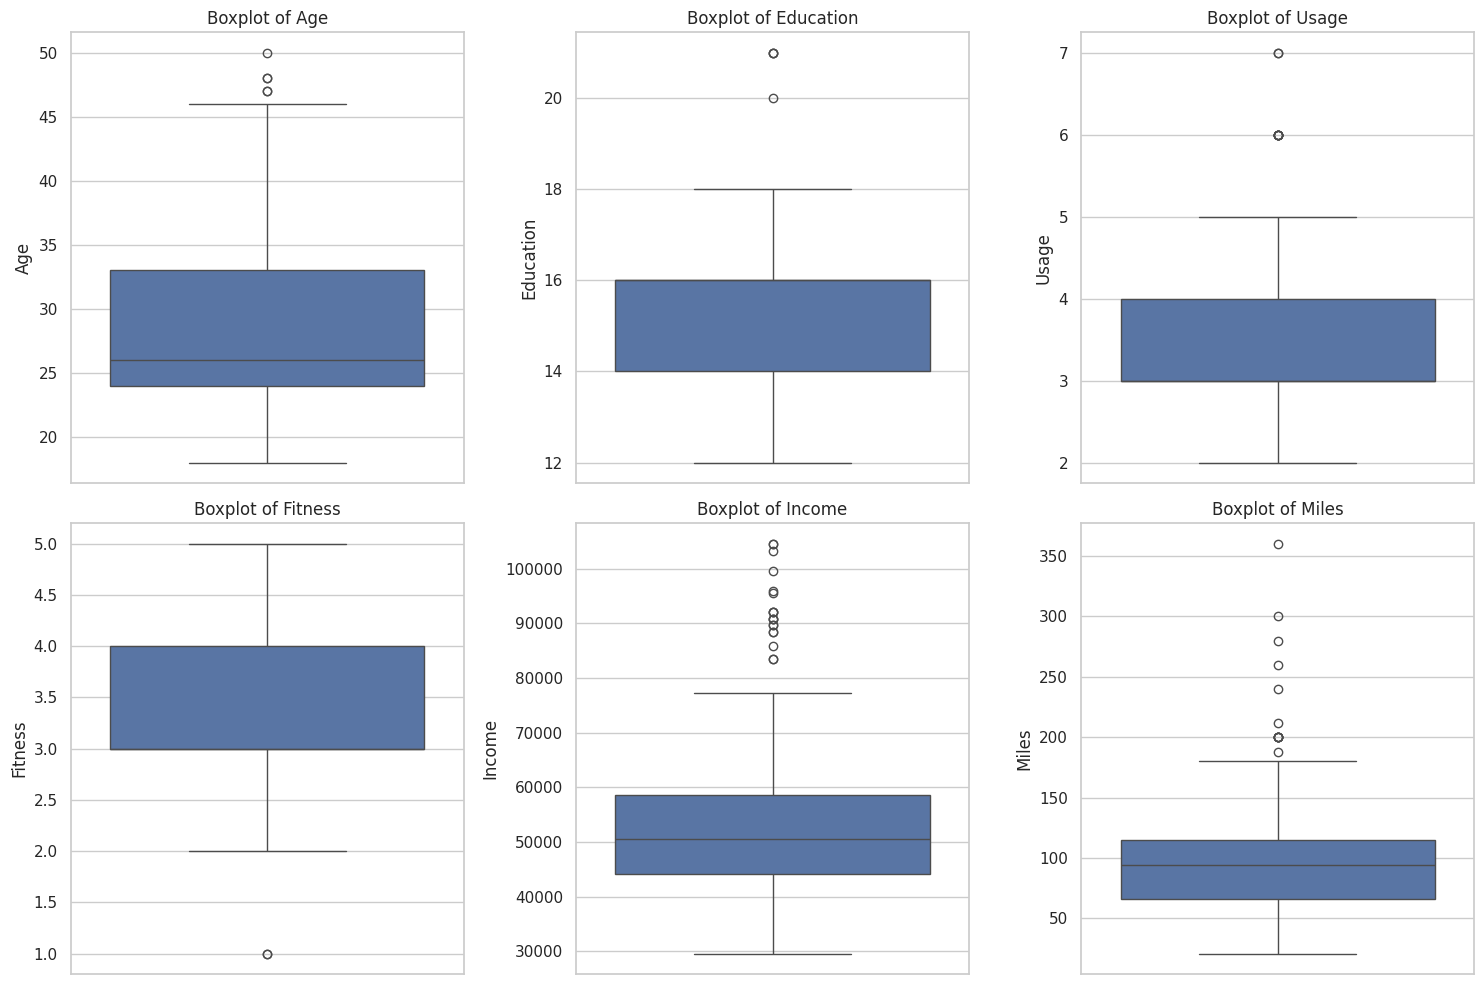

In [194]:
# Identify numerical columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed
num_vars = len(numerical_vars)
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols

# Plotting boxplots for each numerical variable
plt.figure(figsize=(15, 5 * num_rows))
for i, var in enumerate(numerical_vars):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[var], showfliers=True)
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

###### **Inference :**
- Age: The boxplot shows a slight positive skewness, indicating that most customers are between 20 and 35 years old, with a few outliers around 45-50 years. This suggests that the majority of Aerofit's customers are younger adults.

- Education: The distribution of years of education is slightly right-skewed with a few outliers above 18 years of education. Most customers have between 12 and 16 years of education, suggesting that the customer base is fairly educated.

- Usage: The usage of the treadmill by customers is generally consistent, with most people planning to use it between 2 to 5 times a week. There are a few outliers indicating higher usage (up to 7 times a week), which suggests that some customers are very frequent users.

- Fitness: Fitness levels are fairly evenly distributed with a slight concentration towards a fitness level of 3 to 4. There is one outlier at the low end, indicating a customer who rates their fitness as very poor.

- Income: The income distribution is positively skewed, with a significant number of outliers on the higher end (above $80,000). This suggests that while most customers have a moderate income, Aerofit also attracts higher-income customers.

- Miles: The miles expected to be run/walked each week is also positively skewed, with most customers expecting to run/walk between 50 to 150 miles. There are some significant outliers above 250 miles, indicating a few customers with very high expectations for usage.

###### **Recommendations :**
- Target Marketing: Aerofit can target its marketing efforts toward younger adults, particularly those aged between 20-35, who make up the bulk of their customer base. Additionally, campaigns can be designed to appeal to highly educated individuals.

- Product Differentiation: Since there are customers who use the treadmill very frequently (as shown by the outliers in the usage variable), Aerofit could consider developing or promoting a more durable or feature-rich treadmill specifically designed for these heavy users.

- Pricing Strategy: Given the presence of high-income customers, Aerofit might consider offering premium products or services that cater to this segment, such as exclusive treadmill models with advanced features or personalized training programs.

- Customer Engagement: Aerofit could develop programs or content targeted at customers who rate their fitness levels lower. This could include beginner workout plans or fitness improvement challenges, aimed at helping these customers get the most out of their treadmill usage.

- Product Bundling: For customers who expect to run/walk high miles, Aerofit could offer product bundles that include accessories or maintenance services, which would be attractive to high-usage customers who are likely to benefit from these additional products.

#### **Remove/clip the data between the 5 percentile and 95 percentile**

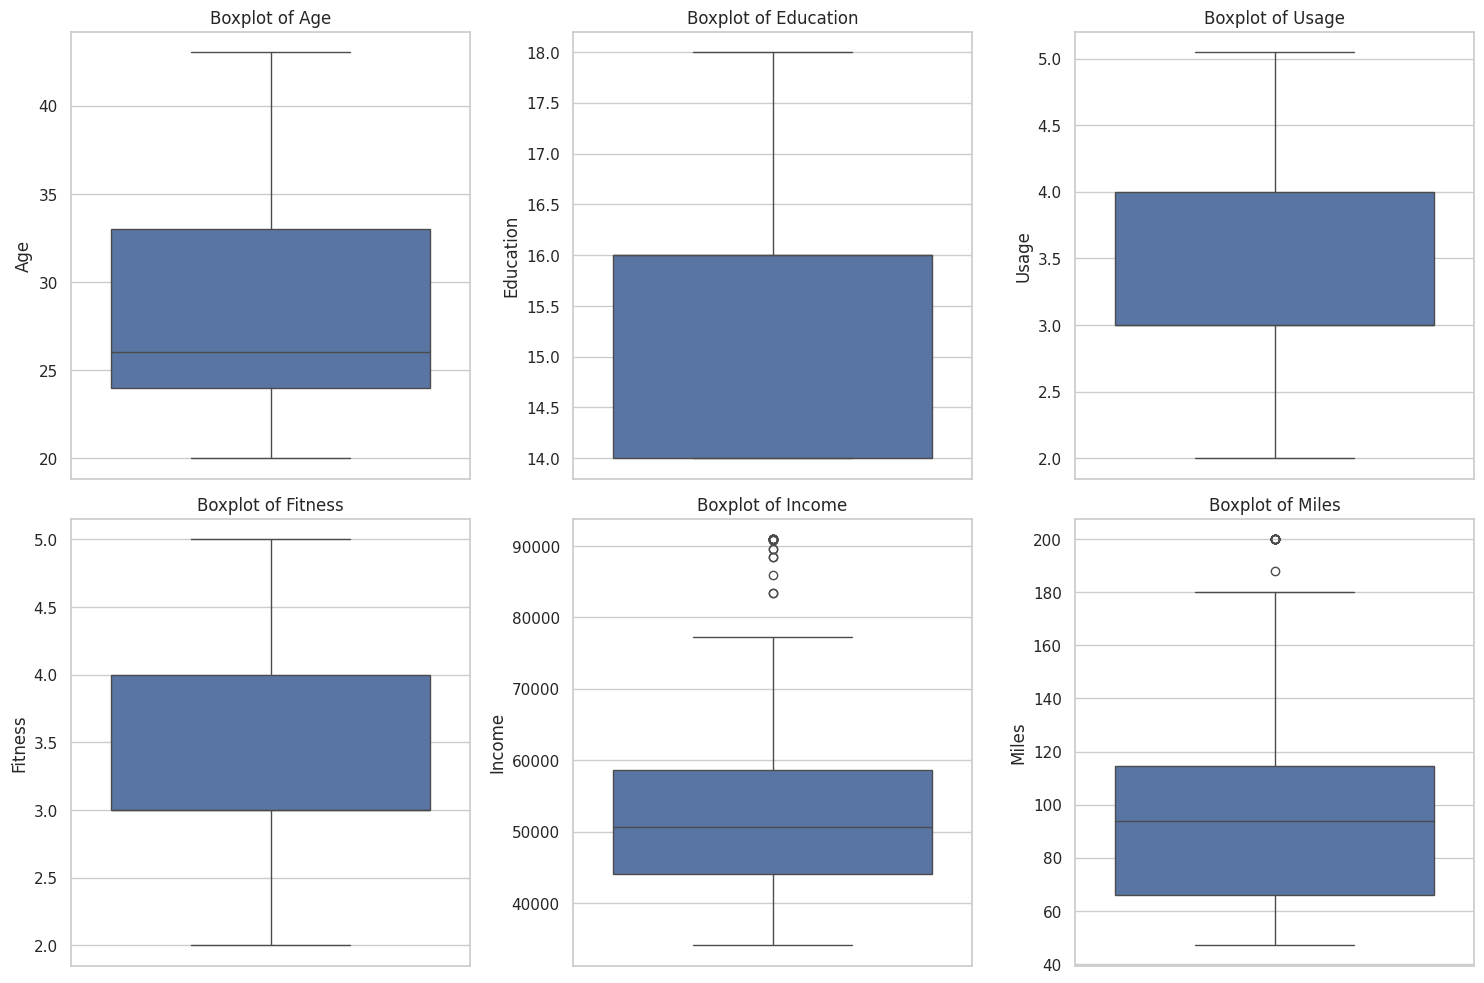

In [195]:
# Identify numerical columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Clip the data between the 5th and 95th percentiles
for var in numerical_vars:
    lower_bound = df[var].quantile(0.05)  # 5th percentile
    upper_bound = df[var].quantile(0.95)  # 95th percentile
    df[var] = np.clip(df[var], lower_bound, upper_bound)  # Clipping the data



# Plotting boxplots and reverifying for each numerical variable after clipping
plt.figure(figsize=(15, 5 * num_rows))
for i, var in enumerate(numerical_vars):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[var], showfliers=True)
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

## **Check if features like marital status, Gender, and age have any effect on the product purchased**

#### **Analyzing Categorical Variables with Count Plots**

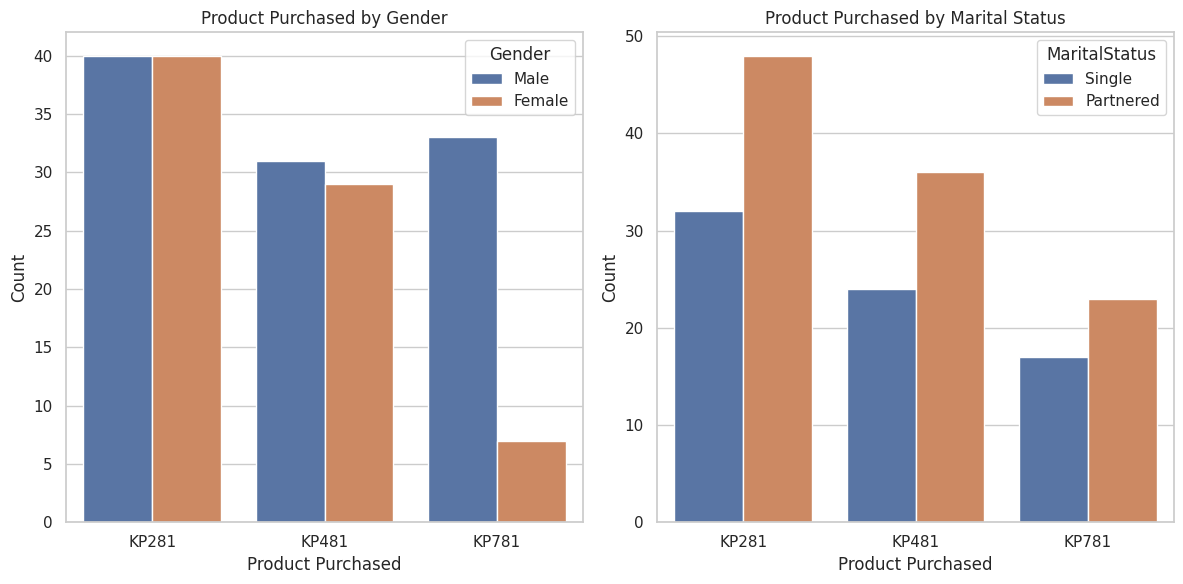

In [196]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Count plot for Gender vs Product Purchased
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Product', hue='Gender')
plt.title('Product Purchased by Gender')
plt.xlabel('Product Purchased')
plt.ylabel('Count')

# Count plot for Marital Status vs Product Purchased
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Product', hue='MaritalStatus')
plt.title('Product Purchased by Marital Status')
plt.xlabel('Product Purchased')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

###### **Inference :**
- Gender and Product Purchases:
  - KP281: Both males and females show similar interest, with nearly equal purchase counts.
  - KP481: Again, both genders have comparable purchase counts for this product.
  - KP781: Here’s where things get interesting. Product KP781 seems to be predominantly favored by males, as there are very few female purchases.
- Marital Status and Product Purchases:
  - Product KP281: Single individuals show significantly higher interest in this product compared to partnered individuals.
  - Product KP481: Partnered individuals have a higher preference for this product.
  - Product KP781: Both singles and partnered individuals exhibit similar purchasing patterns for this product.

###### **Recommendation :**
- Since KP781 has a significant gender disparity, consider tailoring marketing efforts specifically toward females. Understand why this product isn’t resonating with them and explore ways to make it more appealing.

- Given the balanced interest in KP281 and KP481, continue marketing efforts equally to both genders.
- KP281: Target marketing efforts toward singles, emphasizing features that resonate with their preferences.
- KP481: Focus advertising on partnered customers, highlighting aspects that appeal to them.
- KP781: Maintain a balanced approach, as both groups have similar interest in this product.



#### **Analyzing Continuous Variables with Scatter Plots**

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Global variable to keep track of used target variables, so that no repetition of same subplots
used_target_vars = []

def plot_scatter_against_numerical(df, target_variable, numerical_vars):
    """
    Plots scatter plots of the target variable against other numerical variables.

    Parameters:
    df: DataFrame containing the data
    target_variable: The numerical variable to compare against others
    numerical_vars: List of other numerical variables to plot against
    """

    global used_target_vars  # Declare the global variable

    # Add the target variable to the list of used target variables
    used_target_vars.append(target_variable)

    # Remove the target variable from the list of numerical variables if it exists
    numerical_vars = [var for var in numerical_vars if var not in used_target_vars]

    # Set up the figure
    num_vars = len(numerical_vars)
    num_cols = 2
    num_rows = (num_vars + num_cols - 1) // num_cols

    # Create a color palette
    palette = sns.color_palette("husl", n_colors=len(df['Product'].unique()))

    plt.figure(figsize=(15, 5 * num_rows))

    # Add a main title for the figure
    plt.suptitle(f'Scatter Plots of {target_variable} against Other Numerical Variables', fontsize=16)

    for i, var in enumerate(numerical_vars):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.scatterplot(data=df, x=target_variable, y=var, hue='Product', alpha=0.7, palette=palette)
        plt.title(f'{target_variable} vs {var}')
        plt.xlabel(target_variable)
        plt.ylabel(var)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()

##### **Comparing Age with other Numerical Variable and Product**

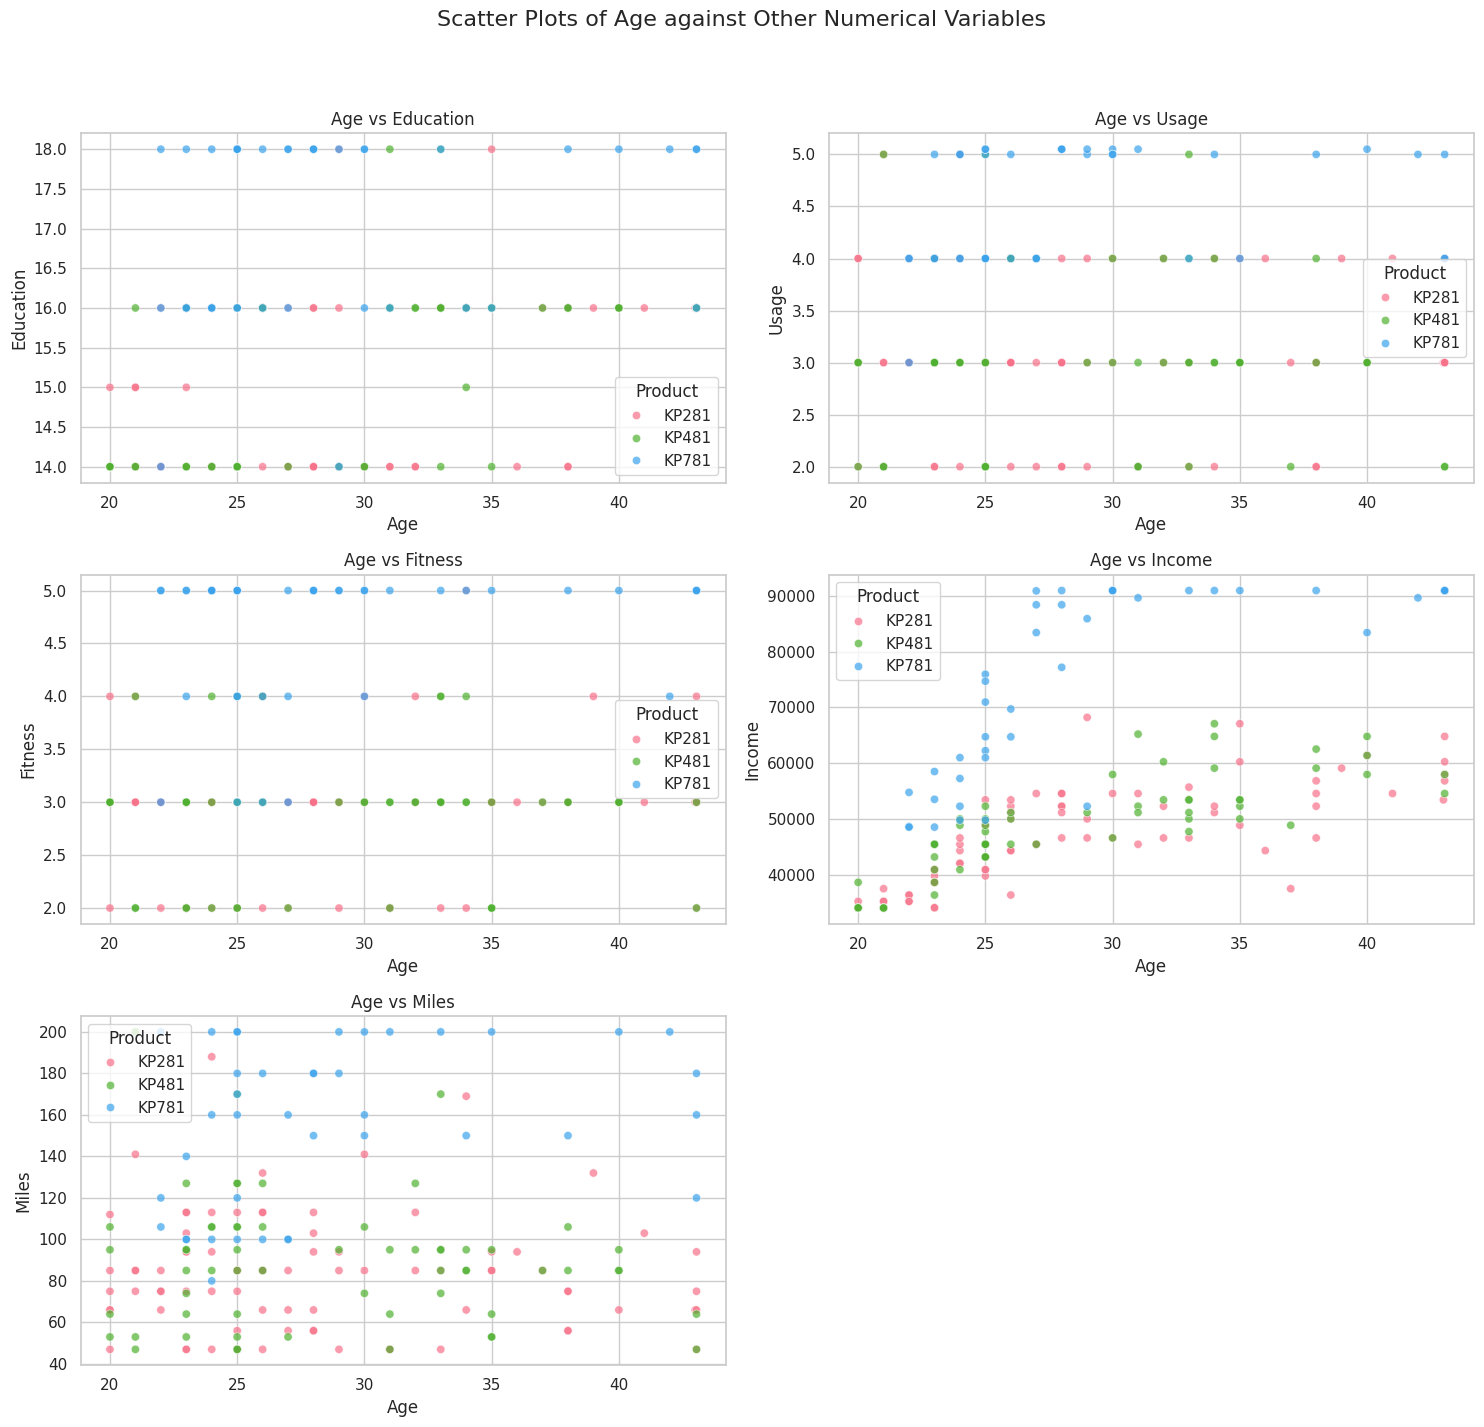

In [198]:
plot_scatter_against_numerical(df, 'Age', numerical_vars)

###### **Inference :**
- Age vs. Education: There doesn’t seem to be a strong correlation between age and education level. People of various ages have different education backgrounds.
- Age vs. Usage: Usage frequency (presumably related to product usage) doesn’t show a clear trend with age. Users of different ages exhibit varying levels of product usage.
- Age vs. Fitness: Again, no strong correlation. Fitness levels appear to be distributed across different age groups.
- Age vs. Income: There might be a slight positive correlation between age and income. Older individuals tend to have higher incomes.
- Age vs. Miles: The planned miles to run (perhaps related to fitness goals) show a slight upward trend with age. Older individuals may plan to run more miles.
- Age vs. Product: Different products have varying age distributions. Understanding these preferences could inform targeted marketing strategies.

###### **Recommendation :**
- Income Segmentation: Consider targeting older age groups for higher-priced products, assuming income correlates positively with age.
- Fitness Campaigns: Tailor fitness-related campaigns based on age groups. Older users might be more interested in fitness products.
- Education-Agnostic Approach: Since education doesn’t strongly correlate with age, avoid education-specific targeting.

##### **Comparing Income with remaining Numerical variable and Product**

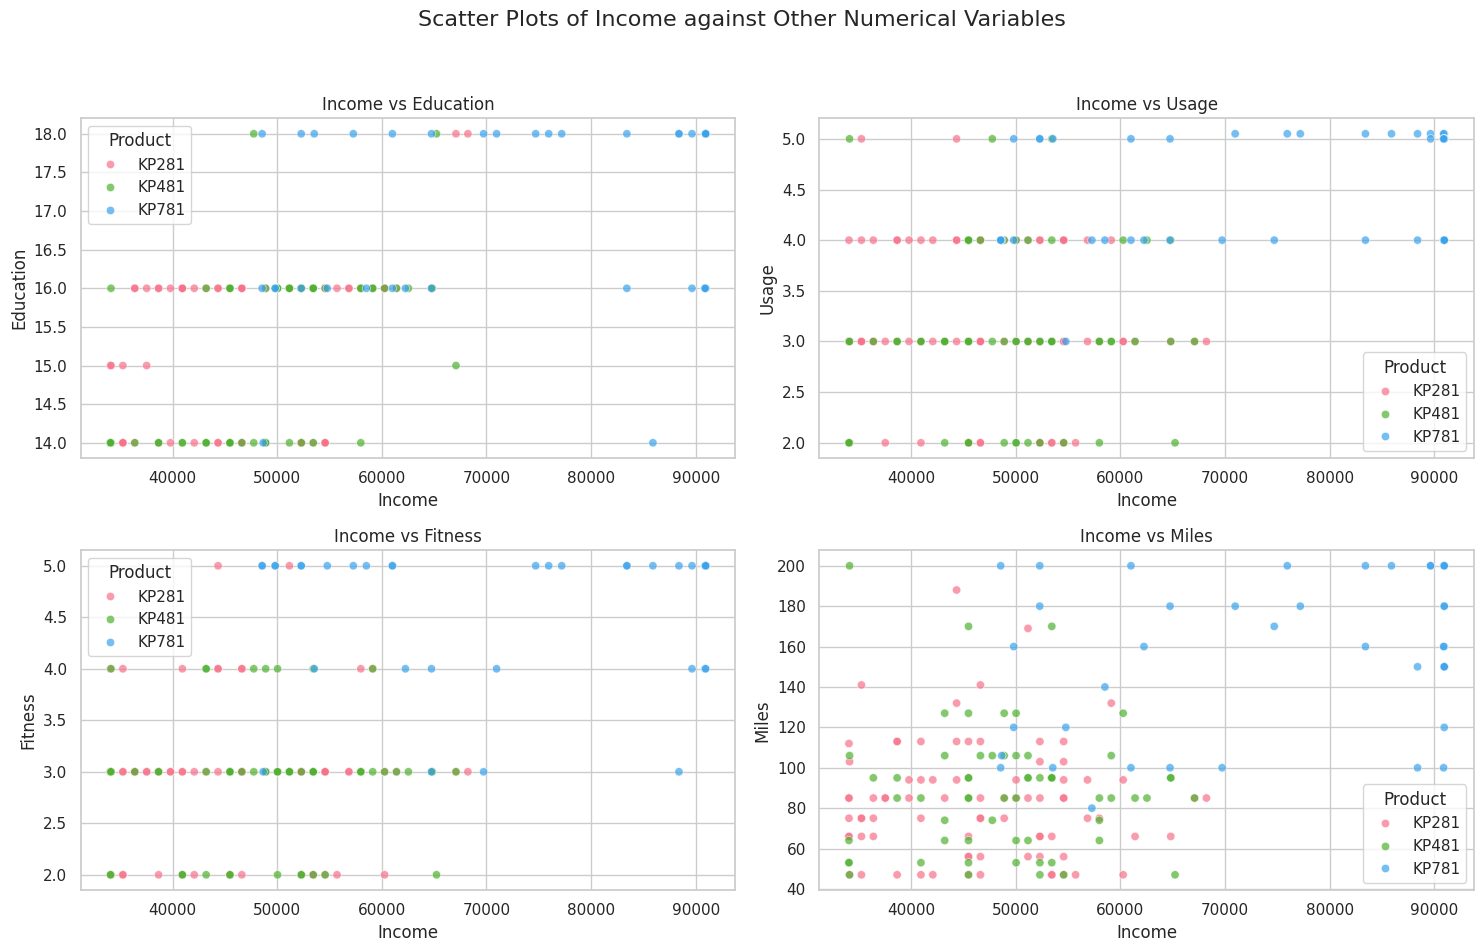

In [199]:
plot_scatter_against_numerical(df, 'Income', numerical_vars)
# plotting of age-income-product will not be repeated as it is depicted in above result

###### **Inference :**
- Education vs. Income:
  - There is no clear linear relationship between education level and income.
  - Income varies across different education levels, with some high-income outliers even among those with lower education.
- Usage vs. Income:
  - Usage frequency (presumably related to product usage) doesn’t show a strong correlation with income.
  - Users with varying income levels exhibit similar usage patterns.
- Fitness vs. Income:
  - Fitness level doesn’t significantly correlate with income.
  - Users across different income brackets have diverse fitness levels.
- Miles vs. Income:
  - There seems to be a slight positive correlation between income and planned miles to run.
  - Higher-income individuals may plan to run more miles.

###### **Recommendation :**
- Targeted Marketing:
  - For fitness-related products, consider segmenting marketing campaigns based on income.
  - Tailor messaging for high-income individuals who plan to run more miles.
- Income-Agnostic Strategies:
  - Since usage and fitness don’t strongly correlate with income, adopt a broader approach for these variables.
  - Focus on other factors (e.g., product features, lifestyle benefits) to engage users.

##### **Comparing Miles with remaining Numerical variable and Product**

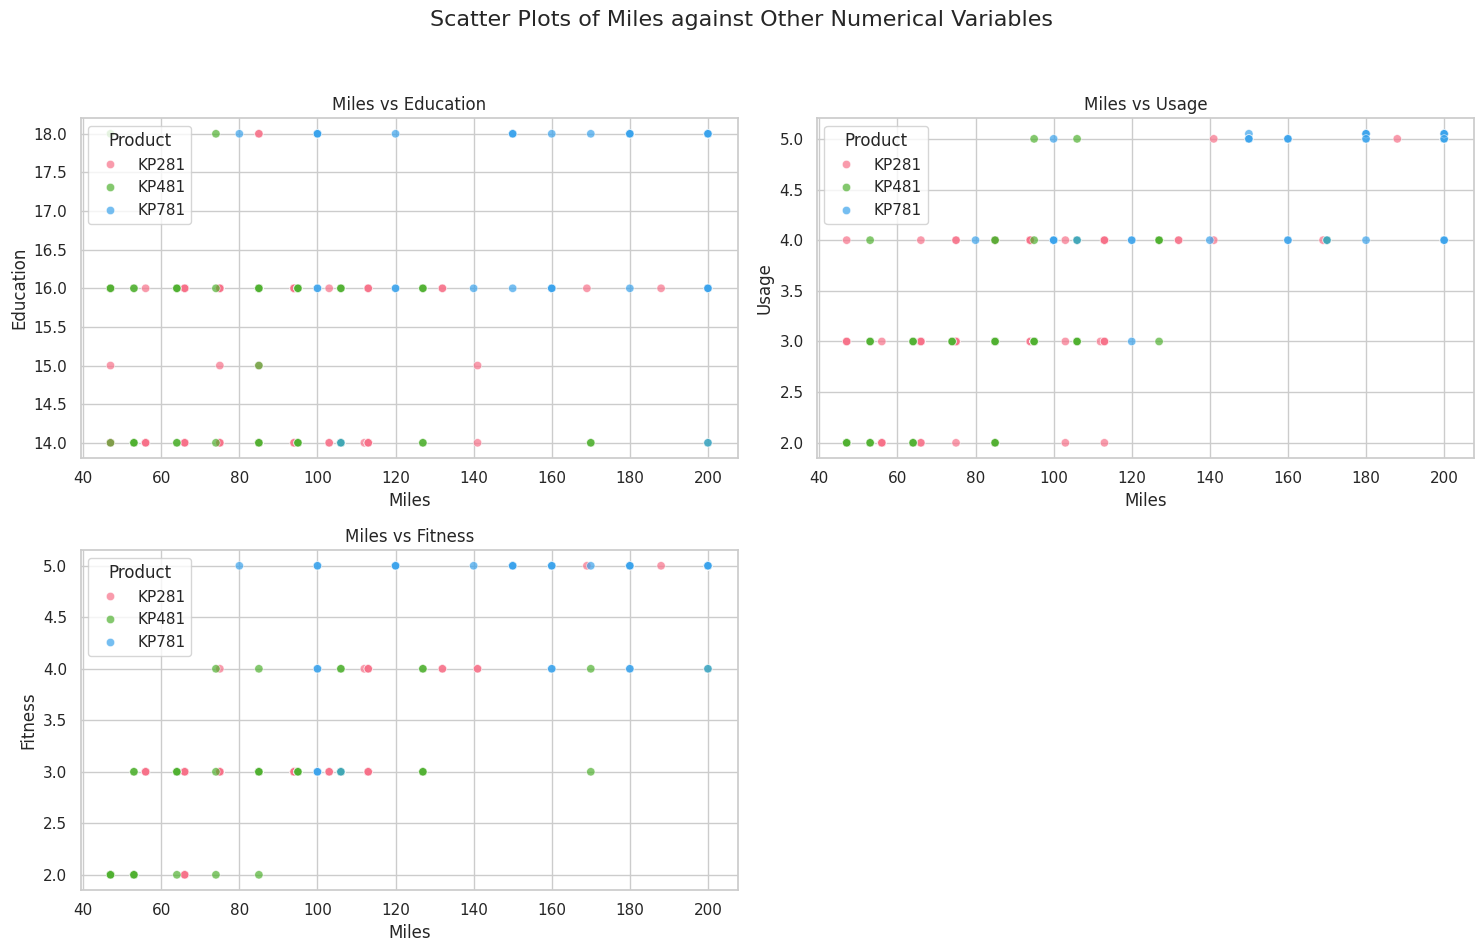

In [200]:
plot_scatter_against_numerical(df, 'Miles', numerical_vars)

###### **Inferance :**
- Miles vs Education:

  - The data points show a very limited spread in education levels, primarily concentrated around specific values (14, 16, and 18).
  - There is no clear pattern or correlation between the number of miles and the level of education.
- Miles vs Usage:
  - The data points are more varied in this plot, with usage levels spread across different values.
  - However, like in the Education plot, there is no strong correlation between the number of miles and usage.
- Miles vs Fitness:
- The fitness levels show more variety compared to education but are still concentrated at specific values (2.0, 3.0, 4.0, 5.0).
- Similar to the other variables, there is no obvious trend or correlation between the number of miles and fitness.

###### **Recommendations :**
- Further Analysis: Conduct statistical analyses, such as calculating correlation coefficients or performing regression analysis, to assess relationships between variables and miles more rigorously.

- Data Segmentation: Break down the dataset into smaller segments (e.g., by age groups or user categories) to uncover hidden patterns that may not be visible in the overall analysis.

- Visualization Adjustments: Explore alternative visualizations like box plots or violin plots to better understand the distribution of variables in relation to miles.

##### **Comparing Fitness with Remaining Numerical variable and Product**

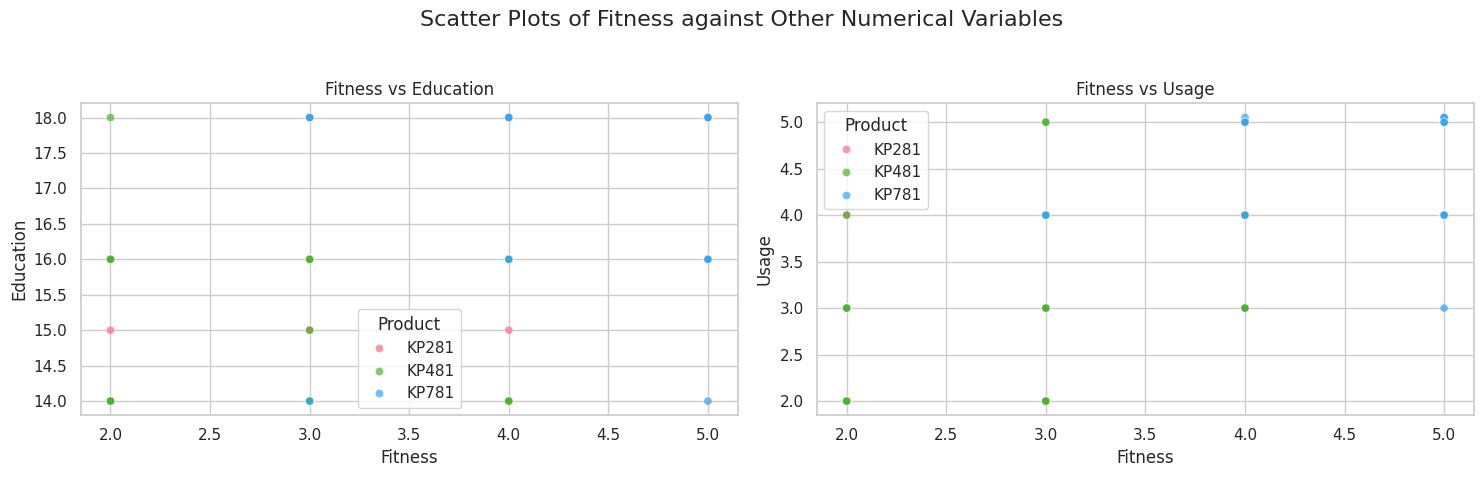

In [201]:
plot_scatter_against_numerical(df, 'Fitness', numerical_vars)

###### **Inference :**
The scatter plots illustrate the relationship between fitness and two numerical variables: Education and Usage for three products (KP281, KP481, and KP781). Key observations include:

- Fitness vs Education: Data points are spread across various education levels (14 to 18), showing no apparent correlation with fitness levels, as each fitness level (2.0 to 5.0) corresponds to multiple education levels without a discernible trend.

- Fitness vs Usage: Similar to education, usage levels (2.0 to 5.0) do not exhibit a clear relationship with fitness, indicating that fitness levels do not predict usage meaningfully.

###### **Recommendations :**
Further Statistical Analysis: Conduct correlation tests (Pearson or Spearman) to quantitatively assess the lack of relationships between fitness, education, and usage. Explore other variables or interaction effects that might reveal associations.

- Data Segmentation: Segment the data by demographic or behavioral factors (e.g., age groups or regions) to uncover potential patterns within subgroups.

- Alternative Visualizations: Utilize heatmaps or pair plots to identify relationships between variables that may not be visible in scatter plots.

- Consider the Context: Reflect on the relevance of these variables to the business case; if they show no meaningful relationships, focus on more pertinent metrics aligned with business goals.

##### **Comparing Usage with Remaining Numerical variable and Product**

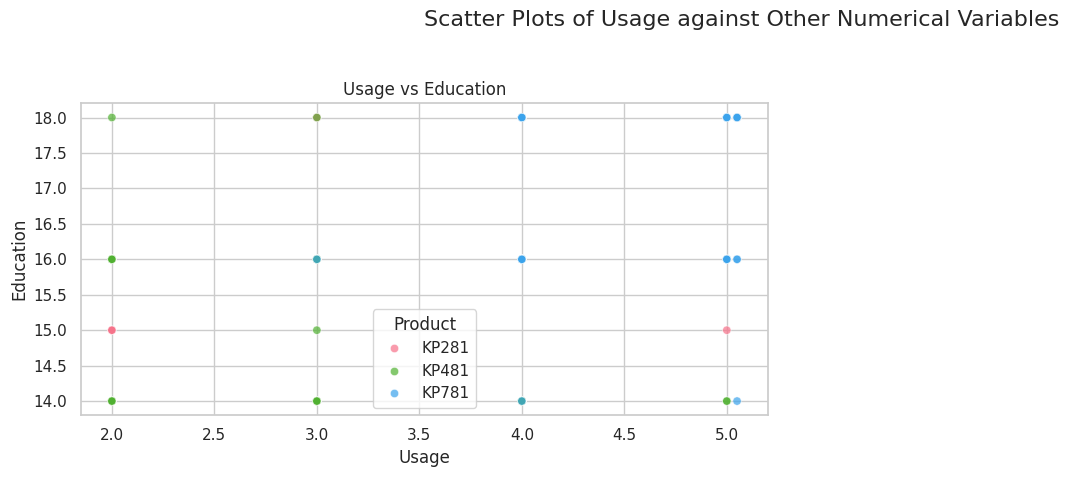

In [202]:
plot_scatter_against_numerical(df, 'Usage', numerical_vars)

###### **Inference :**
The scatter plot shows the relationship between usage and education for three products (KP281, KP481, and KP781). There is no clear correlation between usage and education levels. The data points are spread across different education levels (14 to 18) without any discernible pattern.

###### **Recommendations :**
- Statistical Analysis: Perform correlation analysis to confirm the lack of relationship between usage and education.
- Data Segmentation: Consider segmenting the data by other factors like age or region to uncover potential patterns.
- Alternative Variables: Explore other variables that may show a stronger relationship with usage.

## **Representing the Probability**

### **Find the marginal probability (what percent of customers have purchased (KP281, KP481, or KP781)**

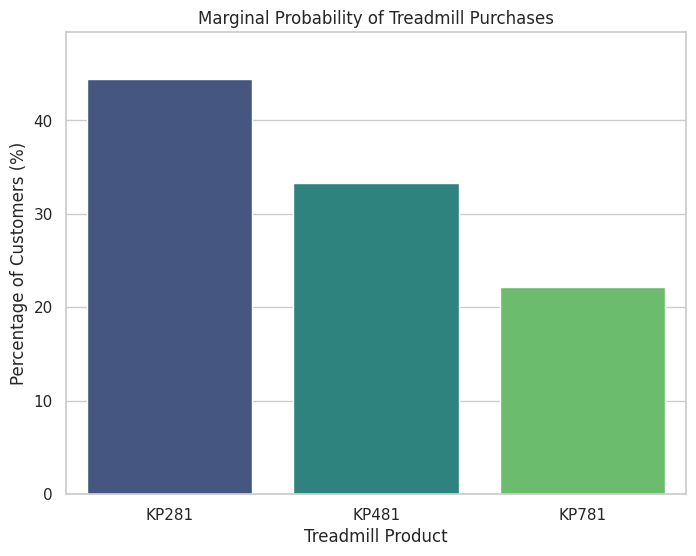

In [203]:
# Create a crosstab to count the occurrences of each product
product_counts = pd.crosstab(index=df['Product'], columns='count')

# Calculate the total number of customers
total_customers = product_counts['count'].sum()

# Calculate the marginal probability for each product
marginal_probability = (product_counts / total_customers) * 100

# Resetting the index for visualization
marginal_probability.reset_index(inplace=True)

# Plotting the marginal probability
plt.figure(figsize=(8, 6))
sns.barplot(data=marginal_probability, x='Product', y='count', palette='viridis')
plt.title('Marginal Probability of Treadmill Purchases')
plt.xlabel('Treadmill Product')
plt.ylabel('Percentage of Customers (%)')
plt.ylim(0, marginal_probability['count'].max() + 5)  # Set the y-axis limit to show the full range
plt.xticks(rotation=0)
plt.show()


###### **Inference :**
- KP281: This treadmill product has the highest marginal probability of - purchase among customers.
- KP481: The second most popular treadmill product.
- KP781: Has the lowest marginal probability of purchase.

###### **Recommendation :**
Given the popularity of KP281, consider focusing marketing efforts on this product. Investigate why KP481 and KP781 have lower purchase probabilities—perhaps adjustments in features, pricing, or promotion strategies could improve their sales.

### **Find the probability that the customer buys a product based on each column.**

In [204]:
def plot_combined_product_purchase_probability(df, categorical_vars):
    """
    Plots the probability of product purchase based on combined categorical variables.

    Parameters:
    df: DataFrame containing the data
    categorical_vars: List of categorical column names to analyze

    Example usage:
        categorical_vars = ['Gender', 'MaritalStatus']
        plot_combined_product_purchase_probability(df, categorical_vars)

    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Define bins for Age and Income if they are included in the categorical_vars
    if 'Age' in categorical_vars:
        age_bins = [18, 30, 40, 50, 60, 80]
        age_labels = ['18-30', '31-40', '41-50', '51-60', '61-80']
        df_copy['AgeGroup'] = pd.cut(df_copy['Age'], bins=age_bins, labels=age_labels)

    if 'Income' in categorical_vars:
        income_bins = [0, 20000, 40000, 60000, 80000, 100000, 200000]
        income_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+']
        df_copy['IncomeGroup'] = pd.cut(df_copy['Income'], bins=income_bins, labels=income_labels)

    # Update categorical_vars to use the binned columns if they were included
    categorical_vars = [
        'AgeGroup' if var == 'Age' else
        'IncomeGroup' if var == 'Income' else
        var
        for var in categorical_vars
    ]

    # Create a combined crosstab using multiple categorical variables
    combined_crosstab = pd.crosstab(
        index=[df_copy[var] for var in categorical_vars],
        columns=df_copy['Product'],
        normalize='index'
    )

    # Plotting the combined crosstab
    combined_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66C2A5', '#FC8D62', '#8DA0CB'])

    # Generate the title with category names
    category_names = " & ".join(categorical_vars)
    plt.title(f'Probability of Product Purchase by {category_names}')

    plt.xlabel('Categories')
    plt.ylabel('Probability')
    plt.legend(title='Product')
    plt.xticks(rotation=65)
    plt.show()

##### **How does the distribution of treadmill product purchases (KP281, KP481, KP781) vary between male and female customers?**

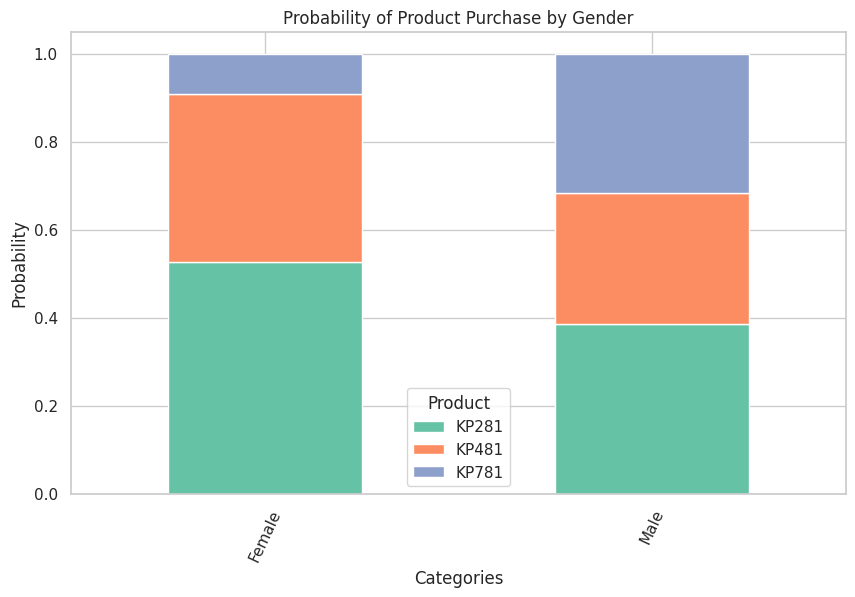

In [205]:
categorical_vars = ['Gender']
plot_combined_product_purchase_probability(df, categorical_vars)

###### **Inference:**
- **KP281**: This treadmill product has the highest probability of purchase among female customers.
- **KP481**: Female customers also show a moderate probability of purchasing this product.
- **KP781**: The highest probability of purchase among male customers.

###### **Recommendation:**
- **Targeted Marketing:**
  - **KP281**: Since it’s popular among females, focus marketing efforts on this product for the female audience.
  - **KP781**: Target male customers with marketing campaigns for this product.
- **Gender-Neutral Strategies:**
  - For males, consider promoting all three products equally, as their probabilities are more evenly distributed.
  - Explore additional factors (e.g., features, pricing) to tailor marketing strategies further.


##### Analyze the probability distribution of treadmill product purchases based on customers' marital status to understand if marital status influences product preference.

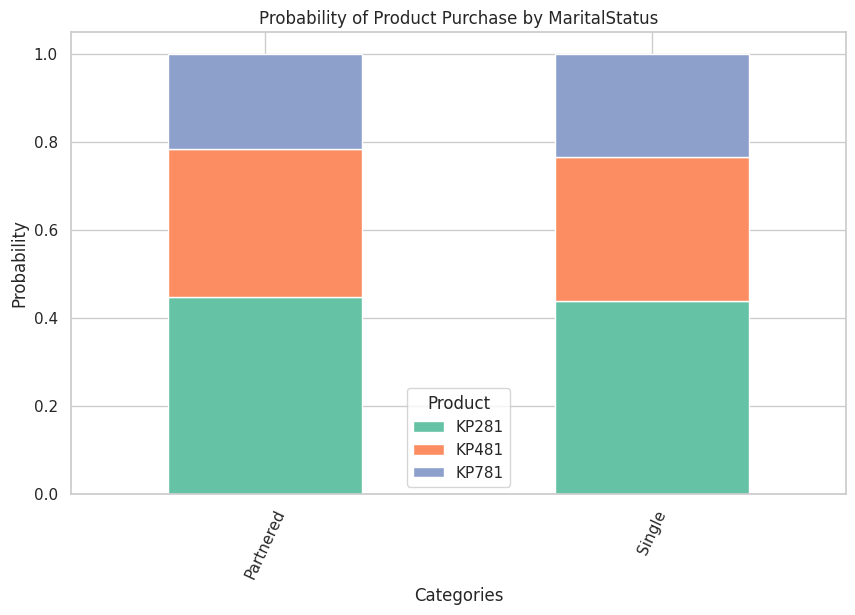

In [206]:
categorical_vars = ['MaritalStatus']
plot_combined_product_purchase_probability(df, categorical_vars)

###### **Inference :**
- **KP281 (Green):** Among partnered individuals, this product has the highest probability of purchase.
- **KP481 (Orange):** The second most likely product to be purchased by partnered individuals.
- **KP781 (Blue):** Single individuals show a higher probability of purchasing this product.

###### **Recommendation :**
- **Targeted Marketing:**
  - **KP281:** Focus marketing efforts on partnered individuals, as they are more likely to buy this product.
  - **KP781:** Tailor marketing strategies toward single individuals, who show a higher likelihood of purchasing this item.

- **Segmented Approach:**
  - Consider separate campaigns for partnered and single customers, emphasizing the respective products with higher probabilities.

- **Marriage Matters:**
  - Explore why KP481 is less popular among both groups—perhaps adjusting features or pricing could boost its appeal.


##### **Examine how different age groups influence the probability of purchasing treadmill products.**

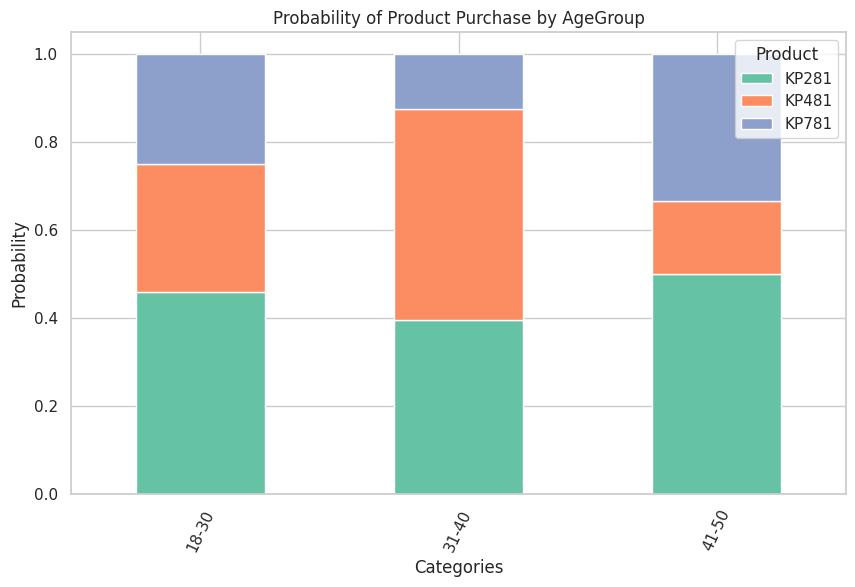

In [207]:
categorical_vars = ['Age']
plot_combined_product_purchase_probability(df, categorical_vars)

###### **Inference:**
- **Product KP781** consistently has a high purchase probability across all age groups.
- **Product KP281** shows a higher purchase probability in the 31-40 age group compared to other groups.
- **Product KP481** has its highest purchase probability in the 18-30 age group.

###### **Recommendations:**
- **Focus marketing efforts on product KP781** universally due to its popularity across all age groups.
- For **product KP281**, target marketing strategies toward individuals aged 31-40.
- Concentrate on the **younger demographic (18-30)** for product KP481.


##### **Analyze how income levels affect the likelihood of purchasing different treadmill products.**

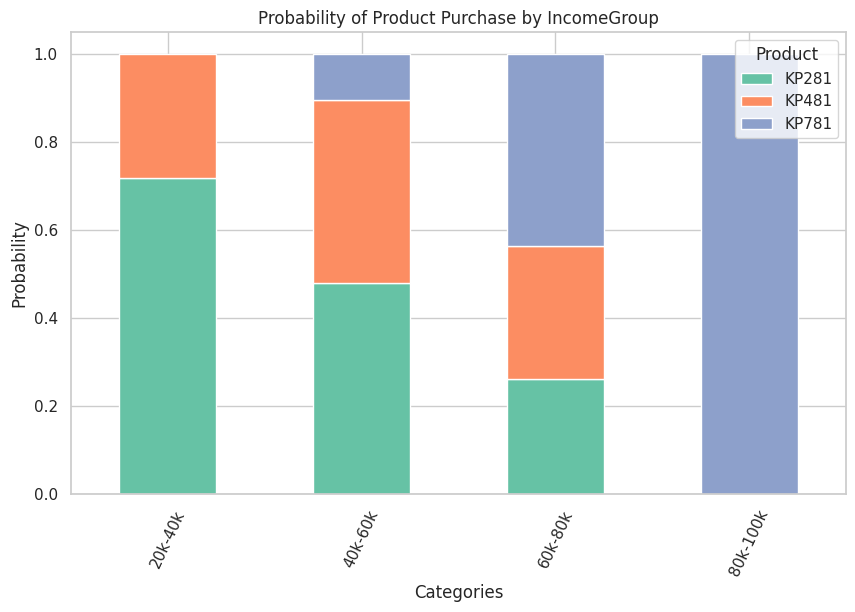

In [208]:
categorical_vars = ['Income']
plot_combined_product_purchase_probability(df, categorical_vars)

###### **Inference :**
- **KP281**: Among individuals with an income between 20K and 40K, this product has the highest probability of purchase.
- **KP481**: The second most likely product to be purchased in the 40K-60K income group.
- **KP781**: Those earning 60K-80K+ show a higher probability of purchasing this product.

###### **Recommendations :**
- Targeted Marketing
  - **KP281**: Focus marketing efforts on the 20K-40K income group, as they are more likely to buy this product.
  - **KP781**: Tailor marketing strategies toward higher-income individuals, who show a higher likelihood of purchasing this item.

- Income Insights
  - Explore why KP481 is less popular among the 40K-60K income group—perhaps adjusting features or pricing could boost its appeal.


##### **Assess the combined effect of gender, marital status, and age group on the probability of purchasing treadmill products.**

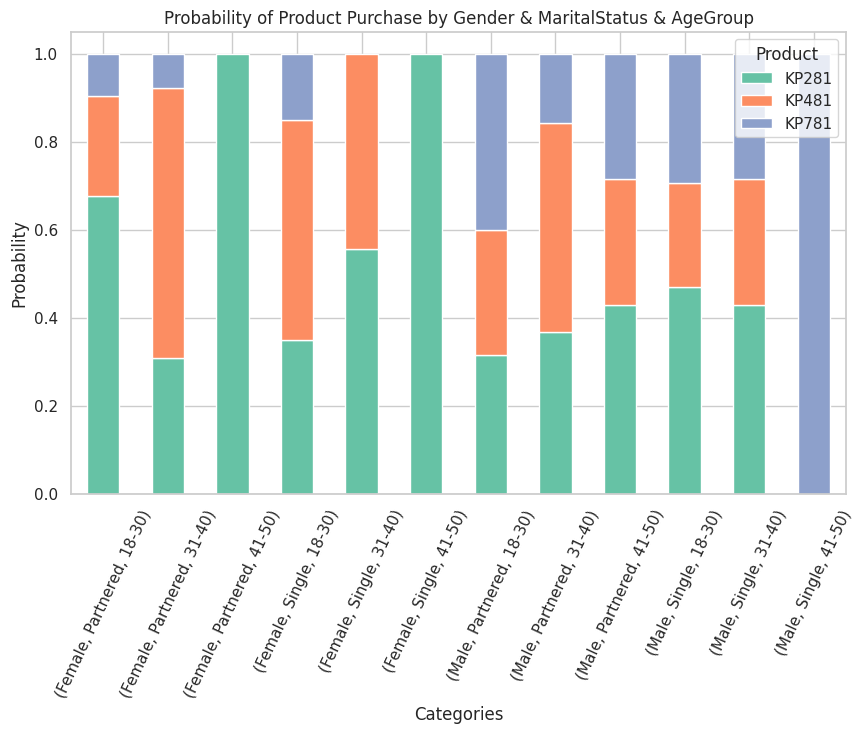

In [209]:
categorical_vars = ['Gender', 'MaritalStatus', 'Age']
plot_combined_product_purchase_probability(df, categorical_vars)

###### **Inference:**
- **Product KP281 Dominance:**
  - Across all categories, product KP281 (represented in green) has the highest probability of being purchased, particularly among females who are partnered, regardless of age group.
  - Males, whether single or partnered, also show a high probability of purchasing KP281, though slightly less than females.

- **Product KP481 Preference:**
  - Product KP481 (represented in orange) has a moderate probability of purchase, especially among females who are single across all age groups. It also shows a relatively higher probability among partnered males aged 18-30.

- **Product KP781 Niche:**
  - Product KP781 (represented in blue) has a lower probability of purchase overall but is notably preferred by single males in the 41-50 age group, where it shows the highest probability among all categories for this product.

###### **Recommendations:**
- **Target Marketing for KP281:**
  - Focus marketing efforts on females, particularly those who are partnered, as they show the highest likelihood of purchasing KP281. Consider campaigns that resonate with this demographic.

- **Expand KP481 Among Single Consumers:**
  - Since KP481 has a higher probability among single females and younger partnered males, tailor the marketing strategy to appeal to single consumers and younger couples.

- **Niche Marketing for KP781:**
  - Given KP781's appeal to single males aged 41-50, consider niche marketing strategies that target this demographic. Highlight features that may resonate with this age group.

- **Cross-Sell Opportunities:**
  - Given the varying preferences, consider cross-selling or bundling strategies that combine products KP281 and KP481, especially for demographics that show an interest in both.


### **Find the conditional probability that an event occurs given that another event has occurred.**

In [210]:
def plot_conditional_probability(df, categorical_var, product):
    """
    Plots the conditional probability of purchasing a specific product based on a categorical variable.

    Parameters:
    df: DataFrame containing the data
    categorical_var: The categorical column name to analyze
    product: The specific product to calculate the conditional probability for

    Example usage:
        plot_conditional_probability(df, 'Gender', 'KP281')
    """
    # Create a temporary DataFrame with only the relevant columns
    temp_df = df[['Product']].copy()
    # Add the categorical variable to the temporary DataFrame
    temp_df[categorical_var] = df[categorical_var]

    # Handle Age and Income with bins
    if categorical_var == 'Age':
        # Define age bins and labels
        bins = [18, 30, 40, 50, 60, 80]
        labels = ['18-30', '31-40', '41-50', '51-60', '61-80']
        temp_df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
        categorical_var = 'AgeGroup'

    elif categorical_var == 'Income':
        # Define income bins and labels
        income_bins = [0, 20000, 40000, 60000, 80000, 100000, 200000]
        income_labels = ['<20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K+']
        temp_df['IncomeGroup'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)
        categorical_var = 'IncomeGroup'


    # Create a crosstab of the categorical variable and the product
    crosstab = pd.crosstab(temp_df[categorical_var], temp_df['Product'])

    # Calculate conditional probability for the specified product
    conditional_prob = crosstab[product] / crosstab.sum(axis=1)

    # Plotting the conditional probabilities
    conditional_prob.plot(kind='bar', color='skyblue')
    plt.title(f'Conditional Probability of Purchasing {product} by {categorical_var}')
    plt.xlabel(categorical_var)
    plt.ylabel('Conditional Probability')
    plt.xticks(rotation=45)
    plt.show()

##### **Determine the conditional probability that a customer purchases KP281 given that they are male.**

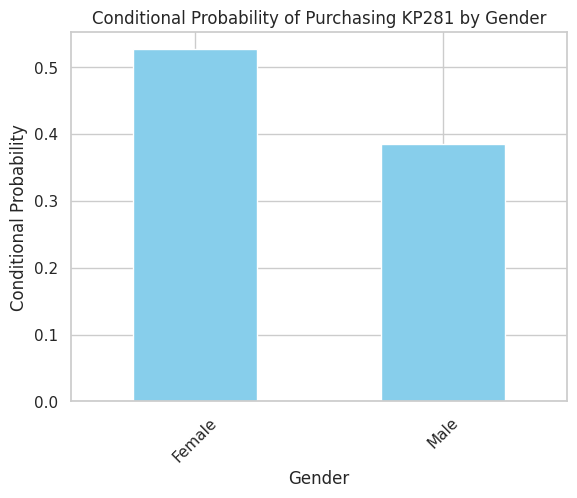

In [211]:
plot_conditional_probability(df, 'Gender', 'KP281')

###### **Inference :**
- Females exhibit a higher conditional probability of purchasing **KP281** compared to males. This suggests that the product resonates more with female consumers.
- Possible reasons for this difference could include gender-specific preferences, marketing effectiveness, or product features that appeal more to women.

###### **Recommendations :**
- **Targeted Marketing**: Given the higher likelihood among females, tailor marketing efforts specifically toward this demographic. Highlight aspects of KP281 that align with female preferences.
- **Product Enhancement**: Investigate why males have a lower probability. Consider product improvements or features that might attract male consumers.
- **Market Research**: Conduct further research to understand the underlying factors driving these gender-based differences. Surveys, focus groups, or user feedback can provide valuable insights.


##### **Assess the conditional probability that a customer aged 31-40 will purchase KP481.**

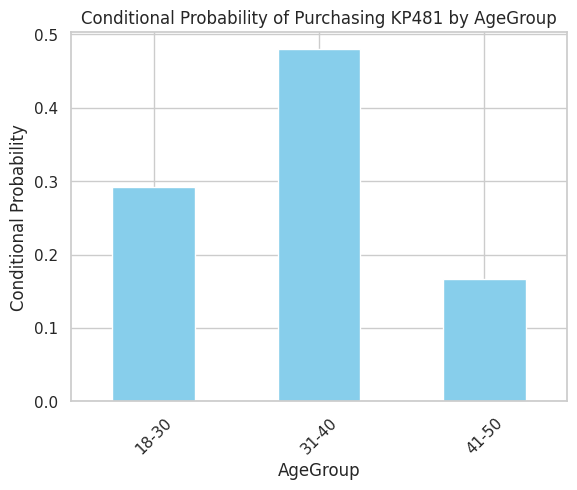

In [212]:
plot_conditional_probability(df, 'Age', 'KP481')

###### **Inference :**
- The age group “31-40” shows the highest conditional probability of purchasing **KP481** (approximately 40%).
- Individuals aged 18-30 have a lower probability (around 30%), while those aged 41-50 exhibit the lowest likelihood (about 20%).

###### **Recommendations :**
- **Targeted Marketing**: Focus marketing efforts on the 31-40 age group, as they are the most promising segment.
- **Product Customization**: Investigate why other age groups show lower interest. Consider tailoring features or messaging to address their preferences.
- **Market Research**: Conduct surveys or user feedback sessions to understand age-specific buying behaviors better.


##### **Calculate the conditional probability of purchasing KP781 given that a customer has an income between 40K and 60K.**

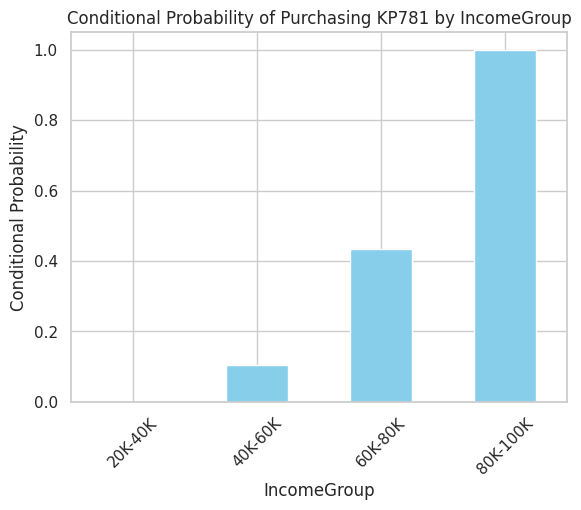

In [213]:
plot_conditional_probability(df, 'Income', 'KP781')

###### **Inference :**
- As income increases, the likelihood of purchasing **KP781** also rises.
- There’s a clear positive correlation between income level and the probability of buying this product.

###### **Recommendations :**
- **Target High-Income Groups**: Focus marketing efforts on individuals in higher income brackets, as they are more likely to purchase **KP781**.
- **Accessibility for Lower-Income Groups**: Consider strategies to make **KP781** appealing or accessible to lower-income segments.
- **Market Research**: Understand income-specific preferences and tailor messaging accordingly.


##### **Evaluate the conditional probability that a partnered individual will purchase KP281.**

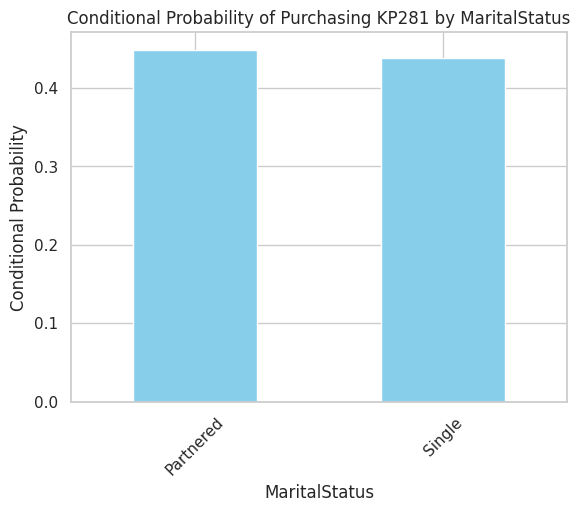

In [214]:
plot_conditional_probability(df, 'MaritalStatus', 'KP281')

###### **Inference :**
- The conditional probability of purchasing **KP281** is roughly equal for individuals who are partnered and those who are single.
- Both groups show similar heights in their respective bars, indicating no significant difference in purchasing probability based on marital status.

###### **Recommendations :**
- Since marital status doesn’t appear to strongly influence purchasing behavior for **KP281**, marketing strategies can focus on other attributes or demographics that might show more variation.
- Consider targeting factors like age, income, or specific product features to tailor marketing efforts effectively.


##### **Find the conditional probability that a customer aged 51-60 will purchase KP481.**

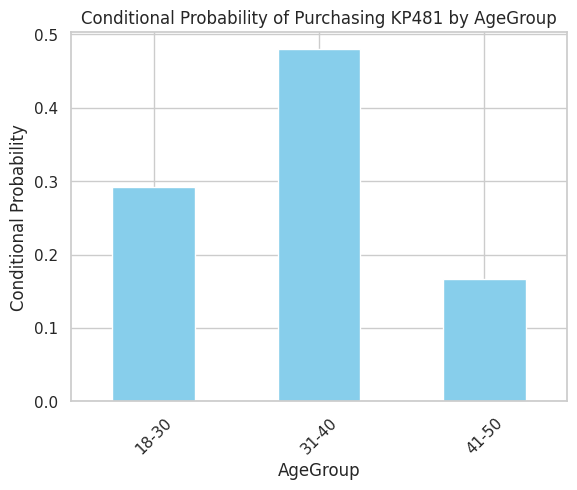

In [215]:
plot_conditional_probability(df, 'Age', 'KP481')

###### **Inference :**
- Individuals in the age group of **31-40** exhibit the highest conditional probability of purchasing **KP481**.
- The **18-30** age group shows a moderate probability, while the **41-50** age group has the lowest likelihood.

###### **Recommendations :**
- **Target the 31-40 Age Group**: Allocate marketing efforts toward individuals aged 31-40, as they are most likely to buy KP281.
- **Segmented Strategies**: Consider tailoring messaging or product features for each age group to maximize appeal.
- **Market Research**: Explore reasons behind the lower probability in the 41-50 age group and adapt strategies accordingly.


##### **Determine the conditional probability that a female customer will purchase KP781.**

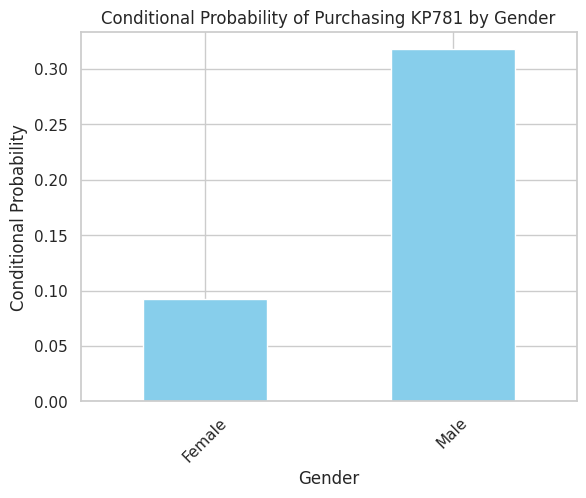

In [216]:
plot_conditional_probability(df, 'Gender', 'KP781')

###### **Inference :**
- Males have a significantly higher conditional probability of purchasing **KP781** compared to females.
- The male bar is much taller, indicating a stronger likelihood of purchase.

###### **Recommendations :**
- **Target Males**: Since males show a higher probability, focus marketing efforts on this demographic.
- **Gender-Specific Strategies**: Tailor messaging or product features to appeal to male preferences.
- **Investigate Female Behavior**: Explore why females have a lower probability and consider strategies to increase their interest.


### **Check the correlation among different factors**

##### **Overall Feature Correlation**

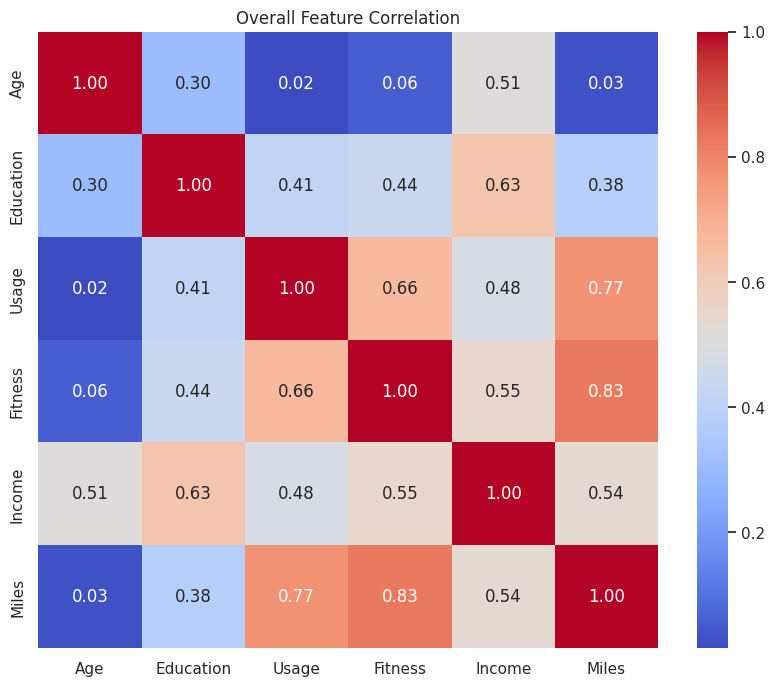

In [220]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Overall Feature Correlation')
plt.show()

###### **Inference:**
- **Strong Correlations:**
  - There is a very strong positive correlation (0.77) between the number of miles and the usage of the product. This suggests that users who use the product more frequently also tend to travel more miles.
  - There is a strong positive correlation (0.83) between fitness levels and the number of miles. This indicates that as fitness levels increase, the number of miles traveled also increases.
  - Fitness and usage are also strongly correlated (0.66), indicating that higher fitness levels are associated with higher usage of the product.
  - There is a strong positive correlation (0.63) between income and education, suggesting that higher levels of education are associated with higher income.

- **Moderate Correlations:**
  - There is a moderate positive correlation (0.55) between income and fitness levels, indicating that individuals with higher income tend to have better fitness.
  - A moderate positive correlation (0.48) exists between income and usage, implying that higher income is associated with higher usage of the product.
  - Education and fitness have a moderate positive correlation (0.44), suggesting that higher education levels are linked to better fitness.
  - Education and usage show a moderate positive correlation (0.41), indicating that higher education levels are associated with higher product usage.

- **Weak Correlations:**
  - There is a weak positive correlation (0.51) between age and income, suggesting that as age increases, income tends to increase slightly.
  - Age and education have a weak positive correlation (0.30), implying that older individuals may have slightly higher education levels.
  - There is a very weak correlation (0.06) between age and fitness, indicating that age does not strongly influence fitness levels.
  - Age and usage have a negligible correlation (0.02), suggesting no significant relationship between the two.

###### **Recommendations:**
- **Target Active Users:** Focus on marketing strategies that emphasize the connection between product usage and fitness, as these two variables are strongly correlated. Highlight the benefits of using the product for achieving fitness goals.
- **Promote Product to High-Income and Educated Individuals:** Since income and education are positively correlated with product usage and fitness, consider targeting higher-income and more educated demographics with premium product offerings or membership plans.
- **Develop Programs to Encourage Usage:** Given the strong correlation between miles traveled and product usage, create programs or challenges that encourage users to log more miles, which may lead to higher overall usage.
- **Expand Fitness-Related Features:** As fitness levels are strongly correlated with both usage and miles, consider enhancing fitness-related features or offering additional tools to help users track their fitness progress. This could drive higher engagement.
- **Consider Age-Specific Marketing:** Given the weak correlations between age and other features, develop age-specific marketing campaigns or product features that address the unique needs of different age groups.


##### **Age and Income Relationship**

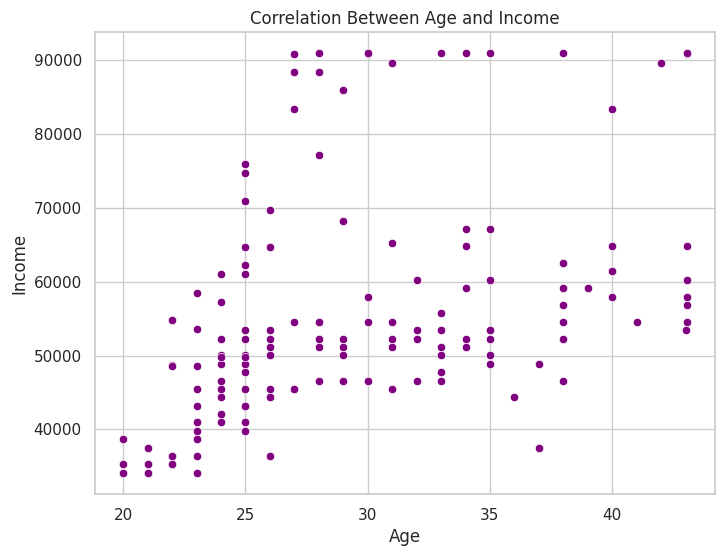

In [221]:
# Visualize correlation between Age and Income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Income', color='purple')
plt.title('Correlation Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

###### **Inference:**
- **Positive Correlation:** The scatter plot suggests a positive correlation between age and income. As individuals get older, their income tends to increase.
- **Age Group Concentration:** Most data points are clustered between ages 20 and 30, with incomes primarily at the lower end of the scale.
- **Income Dispersion:** After age 30, there’s greater income dispersion, with some individuals earning higher incomes.

###### **Recommendations:**
- **To gain deeper insights:**
  - Calculate the correlation coefficient to quantify the strength of the relationship.
  - Consider other factors (e.g., education, occupation) that might influence income.


##### **Impact of Usage on Fitness Level**

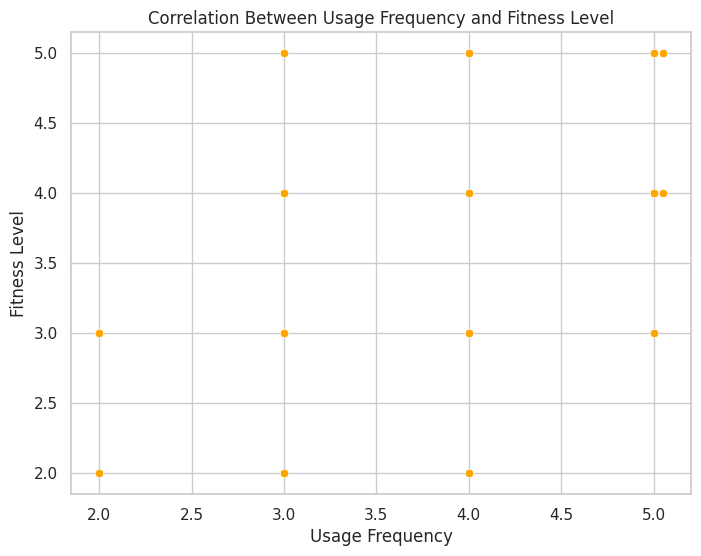

In [222]:
# Visualize correlation between Usage and Fitness Level
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Usage', y='Fitness', color='orange')
plt.title('Correlation Between Usage Frequency and Fitness Level')
plt.xlabel('Usage Frequency')
plt.ylabel('Fitness Level')
plt.show()

###### **Inference:**
- **No Clear Correlation:** Based on the scatter plot, it appears that there is no clear correlation or trend between usage frequency and fitness level within the provided range. The data points are scattered across the graph without forming any distinct pattern. This lack of correlation suggests that simply increasing usage frequency does not necessarily lead to improved fitness.

###### **Recommendations:**
- **Collect More Data:** To gain deeper insights, consider collecting additional data points across a wider range of usage frequencies and fitness levels. A larger dataset may reveal hidden patterns.
- **Explore Other Factors:** Fitness is influenced by various factors beyond usage frequency. Consider examining other variables (such as diet, exercise type, sleep, etc.) to better understand the relationship.
- **Statistical Analysis:** Calculate the correlation coefficient to quantify any potential relationship. If the correlation is weak, explore nonlinear associations or interactions.
- **Individual Variation:** Recognize that individual responses to usage frequency may vary. Some people may benefit more from frequent use, while others may not.


##### **Income vs. Education**

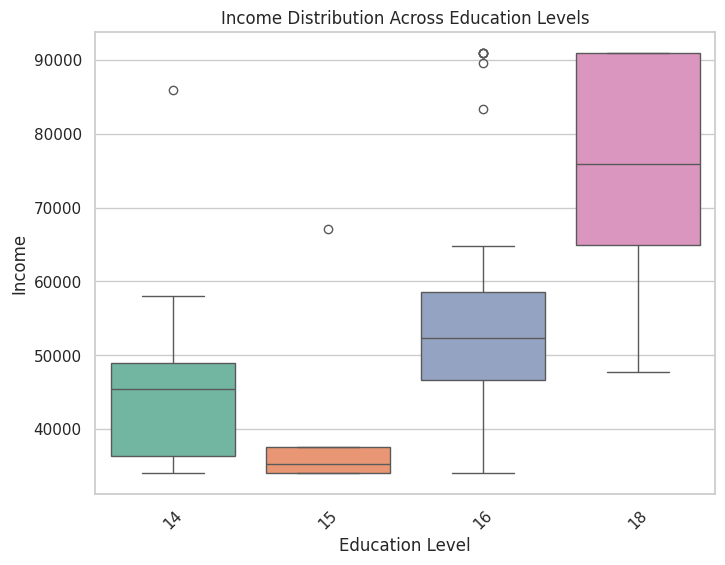

In [223]:
# Visualize correlation between Income and Education
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Education', y='Income', palette='Set2')
plt.title('Income Distribution Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

###### **Inference:**
- **Positive Correlation:** The box plots visually suggest a positive correlation between education level and income. As the education level increases (from 14 to 18), the median income tends to rise.
- **Income Spread:** The range of income varies across education levels. Higher education levels (16 and 18) exhibit a wider spread in income compared to lower levels (14 and 15).
- **Outliers:** There are a few outliers present, especially in the higher education levels, indicating the presence of individuals with exceptionally high incomes.
- **Distribution Shape:** The income distribution within each education level appears to be right-skewed (with a longer tail towards higher incomes), except for the highest level (18), which is relatively symmetrical.

###### **Recommendations:**
- **Education Investment:** Given the positive correlation, investing in higher education can potentially lead to higher income levels. Policymakers and individuals should consider this when making educational decisions.
- **Income Inequality:** Addressing income inequality within each education level could be a focus area. Policies promoting equitable opportunities and skill development might be beneficial.
- **Skill-Based Development:** Focusing on developing skills relevant to higher-paying sectors could be crucial for individuals with lower education levels to improve their earning potential.
- **Further Analysis:** To gain deeper insights, it would be beneficial to explore additional factors influencing income, such as experience, industry, and location.

##### **Fitness and Product Preference**

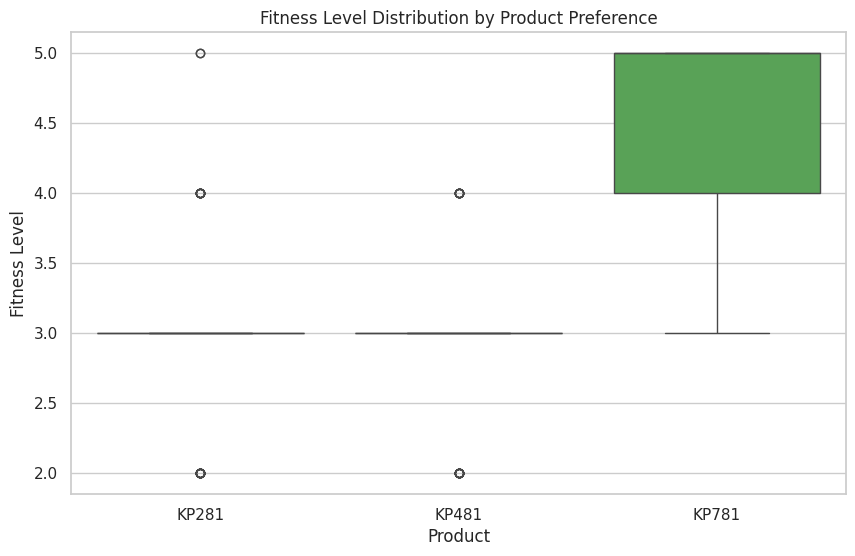

In [224]:
# Visualize correlation between Fitness Level and Product Preference
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product', y='Fitness', palette='Set1')
plt.title('Fitness Level Distribution by Product Preference')
plt.xlabel('Product')
plt.ylabel('Fitness Level')
plt.show()

###### **Inference:**
- **Fitness Level Distribution:** Customers who purchase the KP781 treadmill tend to have higher fitness levels compared to those who purchase KP281 and KP481.
- **Product Segmentation:** The box plots suggest that the three products might cater to different fitness levels. KP281 could be targeted towards individuals with lower fitness levels, while KP781 appeals to customers with higher fitness levels. KP481 seems to cater to a wider range of fitness levels.
- **Outliers:** The presence of outliers in all three product categories indicates that there are customers with exceptionally high or low fitness levels for each product.

###### **Recommendations:**
- **Targeted Marketing:** Aerofit can focus its marketing efforts for KP781 towards fitness enthusiasts and individuals aiming to improve their fitness levels. For KP281, the focus could be on beginners or those with lower fitness goals.
- **Product Positioning:** Clearly communicate the fitness level alignment of each product to help customers make informed decisions.
- **Product Line Expansion:** Consider introducing a product specifically targeted towards customers with exceptionally high fitness levels to cater to the outlier segment.
- **Customer Segmentation:** Further analyze customer data to identify other factors influencing product preference beyond fitness level, such as age, income, and usage.


### **Customer profiling**

In [246]:
def customer_profiling_product(df, product_name):
    """
    Profiles customers for a specific product and visualizes their distributions.

    Parameters:
    df: DataFrame containing the customer data
    product_name: The product for which to profile customers (e.g., 'KP281')
    """
    # Create a copy of the DataFrame and filter for the specified product
    product_purchasers = df.copy()[df['Product'] == product_name]

    # Define bins for age and income
    age_bins = [0, 20, 30, 40, 50, 60, 70, 80, float('inf')]
    age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

    income_bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
    income_labels = ['<20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K+']

    # Categorize Age and Income
    product_purchasers['AgeGroup'] = pd.cut(product_purchasers['Age'], bins=age_bins, labels=age_labels)
    product_purchasers['IncomeGroup'] = pd.cut(product_purchasers['Income'], bins=income_bins, labels=income_labels)

    # Identify columns for analysis
    numerical_columns = product_purchasers.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_columns = product_purchasers.select_dtypes(include=['object', 'category']).columns.tolist()

    # Add AgeGroup and IncomeGroup to the columns to analyze, excluding Age, Income, and Product
    columns_to_analyze = numerical_columns + categorical_columns

    # Exclude 'Age', 'Income', and 'Product' from the analysis
    columns_to_analyze = [col for col in columns_to_analyze if col not in ['Age', 'Income', 'Product']]

    # Visualization
    num_plots = len(columns_to_analyze)
    num_cols = 3  # Number of columns for subplots
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    plt.figure(figsize=(15, 5 * num_rows))
    plt.suptitle(f'Customer Profiling for {product_name}', fontsize=16)  # Add title for the entire figure

    for i, col in enumerate(columns_to_analyze):
        plt.subplot(num_rows, num_cols, i + 1)

        if product_purchasers[col].dtype == 'object' or product_purchasers[col].dtype.name == 'category':
            # Categorical variable
            sns.countplot(data=product_purchasers, x=col, palette='pastel')
            plt.title(f'{col} Distribution of {product_name} Purchasers')
            plt.xlabel(col)
            plt.ylabel('Count')
        else:
            # Numerical variable
            sns.histplot(data=product_purchasers, x=col, bins=10, kde=True, palette='viridis')
            plt.title(f'{col} Distribution of {product_name} Purchasers')
            plt.xlabel(col)
            plt.ylabel('Count')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.show()


##### **KP281 Treadmill Customer Profiling**

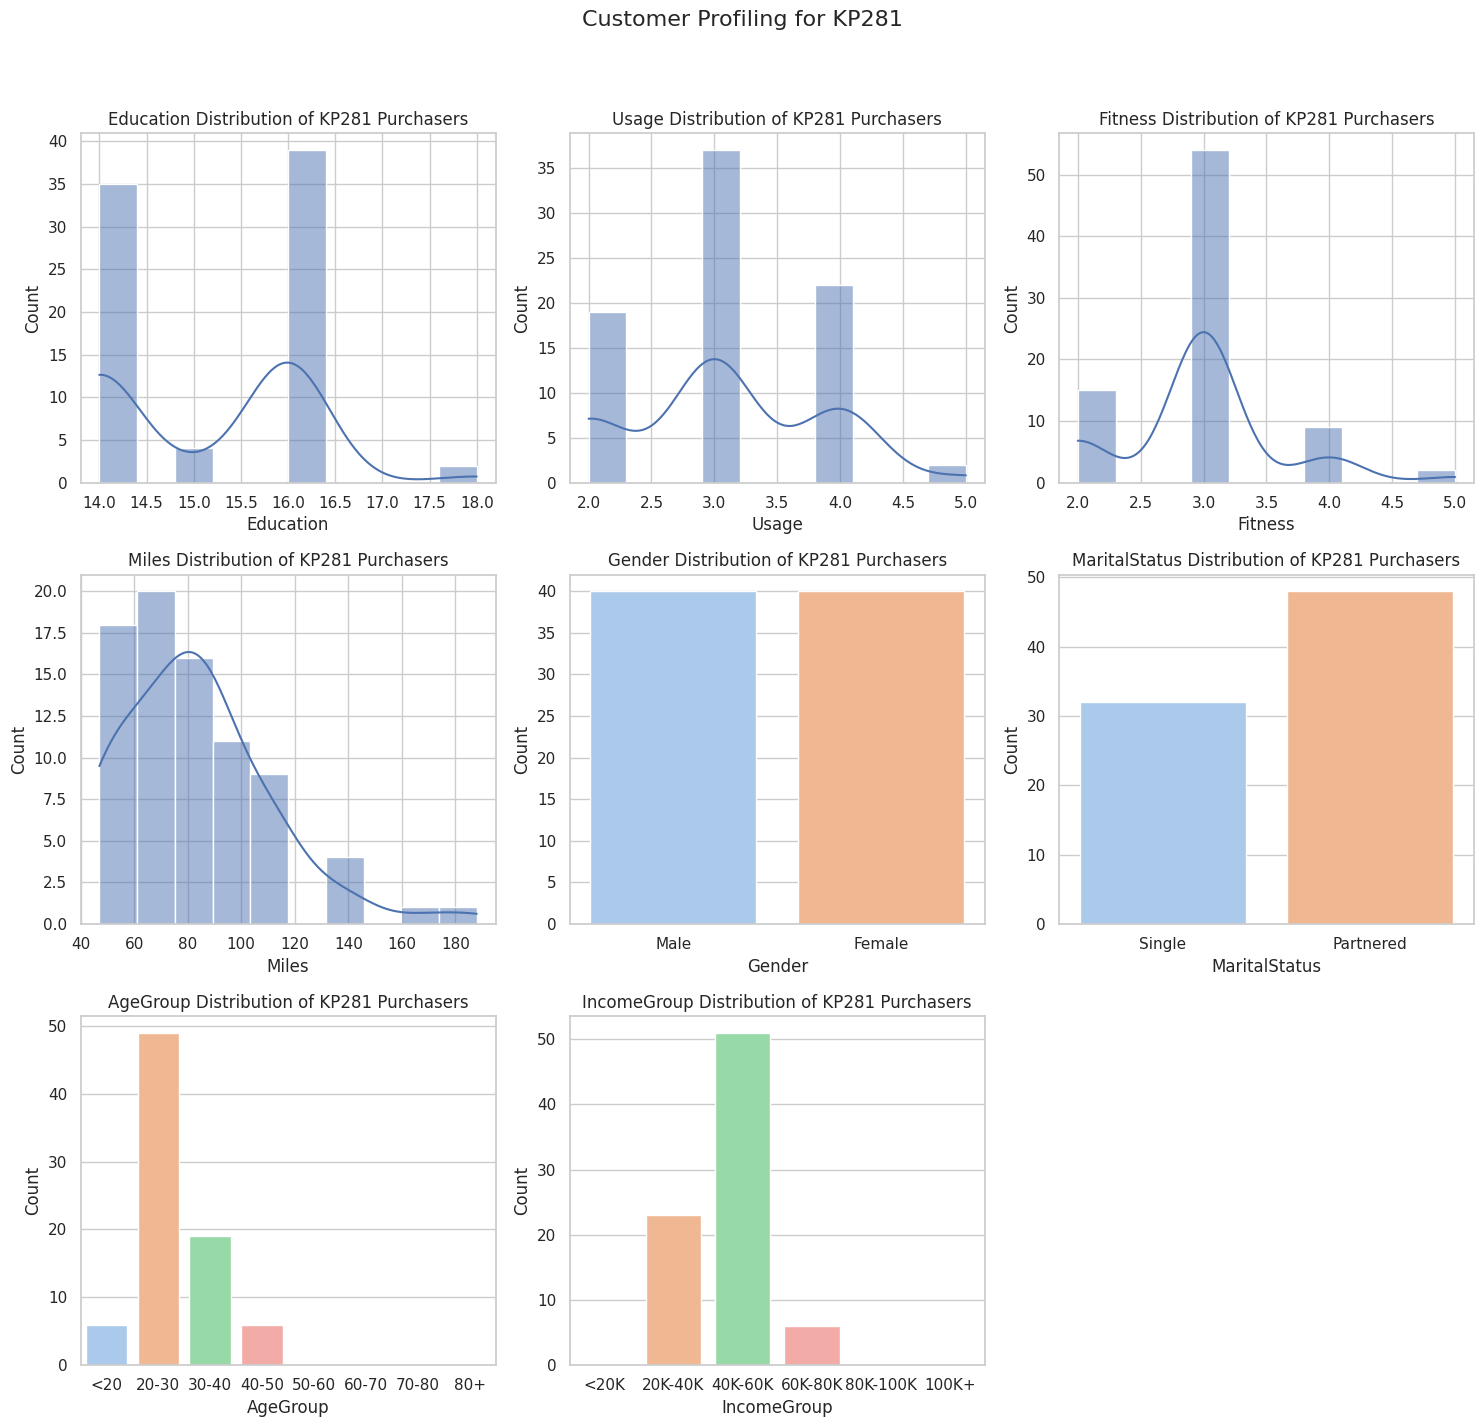

In [247]:
customer_profiling_product(df, "KP281")


###### **Inference:**
- Education Level: The majority of KP281 purchasers have an education level between 15 and 16 years.
- Usage Frequency: Most customers plan to use the treadmill 3-4 times per week.
- Fitness Level: The majority of customers rate their fitness level between 2 and 3 (moderate).
- Miles: The average miles expected to be covered per week are between 60 and 80.
- Gender: There's a slight preference towards male customers.
- Marital Status: A majority of customers are partnered.
- Age Group: The most frequent age group is 20-30 years.
- Income Group: The majority of customers fall within the 20K-40K income group.


###### **Recommendations:**
- Targeted Marketing: Focus marketing efforts on individuals with an education level of 15-16 years, aged 20-30, with a moderate fitness level, and an income range of 20K-40K.
- Product Positioning: Emphasize the treadmill's suitability for moderate usage and fitness levels.
- Value Proposition: Highlight the affordability and accessibility of the KP281 model.
- Customer Education: Provide resources and guidance on achieving fitness goals with moderate usage.
- Partnerships: Explore partnerships with gyms or fitness centers to promote the product.
- Product Bundles: Offer bundled packages with accessories or fitness programs to enhance the overall value proposition.


##### **KP481 Treadmill Customer Profiling**

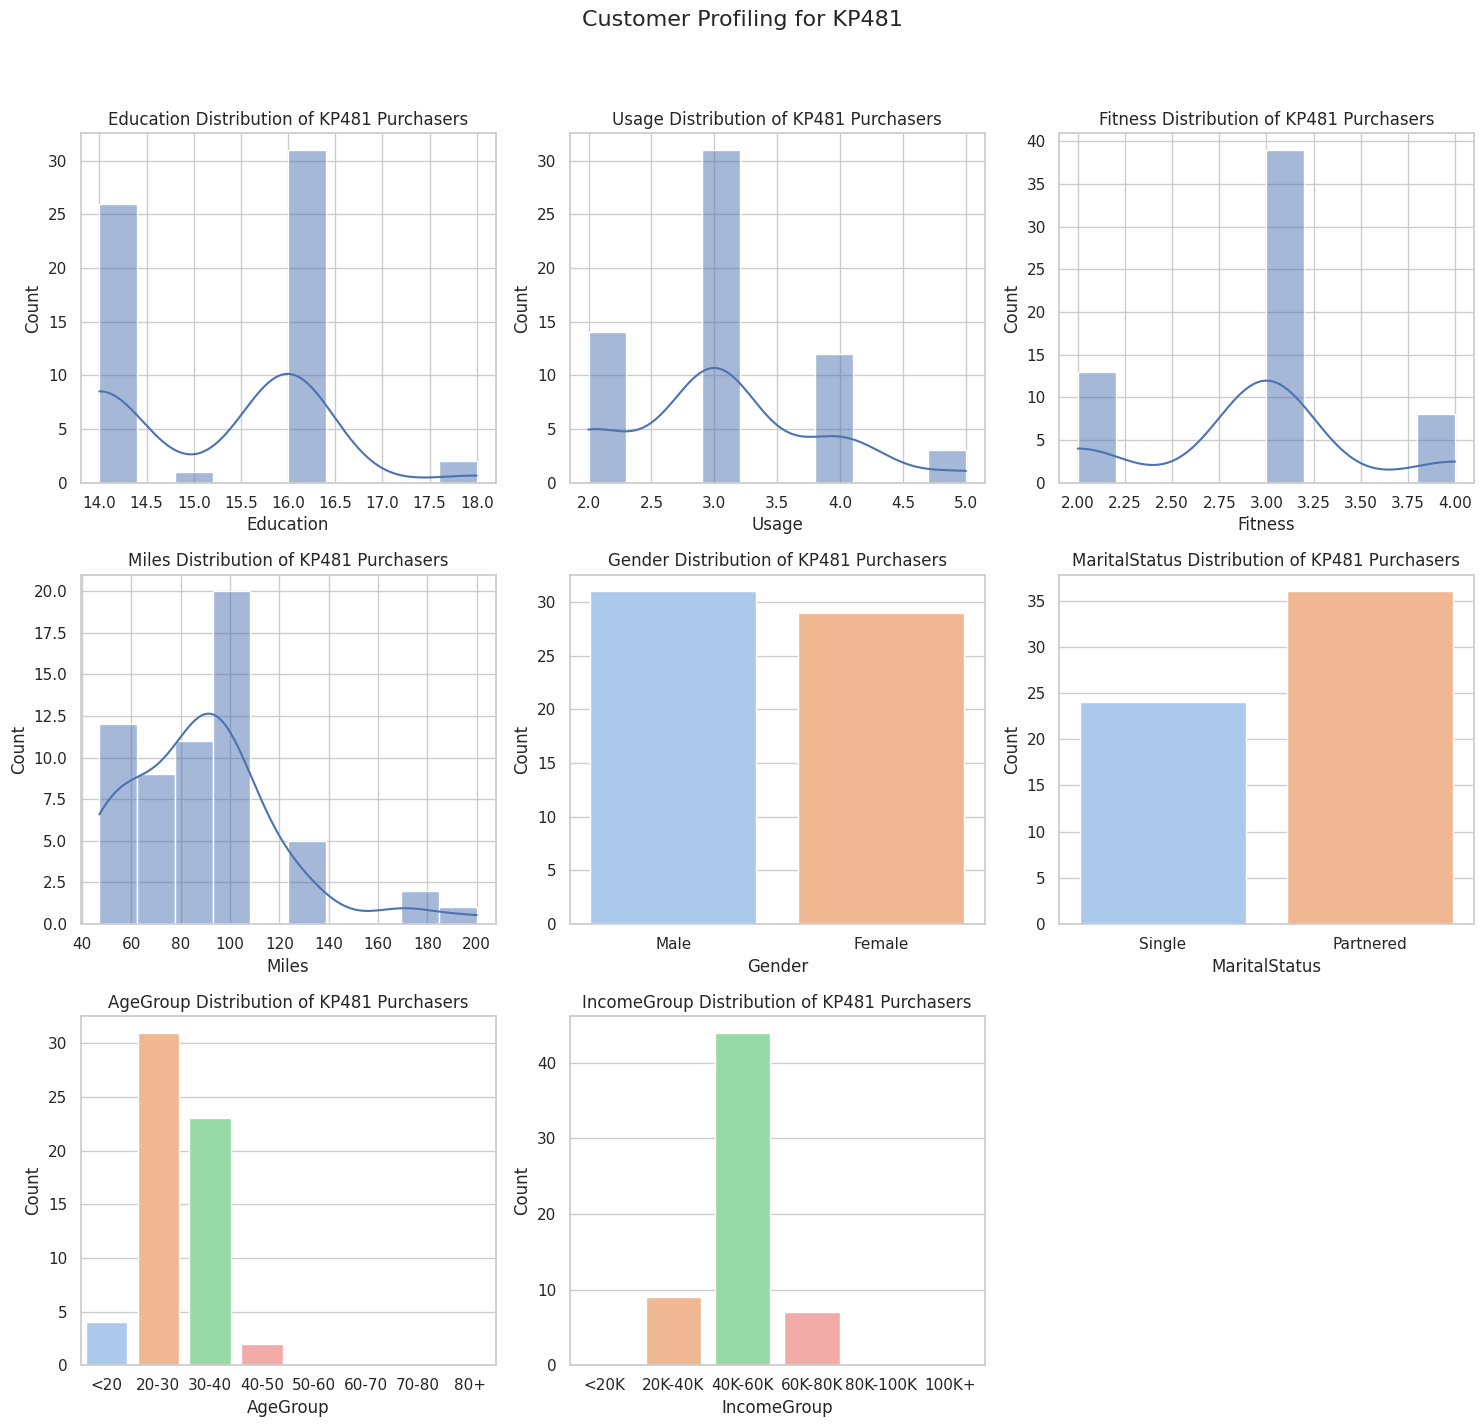

In [248]:
customer_profiling_product(df, "KP481")

###### **Inference:**
- **Demographic Inferences:**
  - Education: The majority of KP481 purchasers have completed 16 years of education.
  - Age: The primary age group for KP481 purchasers is between 30-40 years.
  - Income: The income group of KP481 purchasers primarily falls within the 40K-60K range.
  - Gender: There's a relatively equal distribution between male and female purchasers.
  - Marital Status: A significant portion of KP481 purchasers are partnered.
  
- **Behavioral Inferences:**
  - Usage: Most customers use the treadmill 3-4 times a week.
  - Fitness Level: The majority of purchasers have a moderate fitness level (2-3).
  - Miles: The average distance covered per week is around 80-120 miles.

- **Overall Inference:**
  The typical KP481 customer is a moderately fit, partnered individual with a college education and a stable income, likely in their early to mid-thirties. They use the treadmill regularly for moderate exercise.

###### **Recommendations:**
- Target Audience: Focus marketing efforts on individuals aged 30-40 with a college education and a moderate income.
- Product Positioning: Position the KP481 as a suitable option for individuals seeking to maintain a moderate fitness level through regular use.
- Value Proposition: Emphasize the product's ability to help customers achieve their fitness goals consistently.
- Additional Features: Consider adding features that cater to the specific needs of this customer segment, such as heart rate monitoring or integrated entertainment options.
- Customer Retention: Implement loyalty programs or referral incentives to encourage repeat purchases and customer retention.


##### **KP781 Treadmill Customer Profiling**

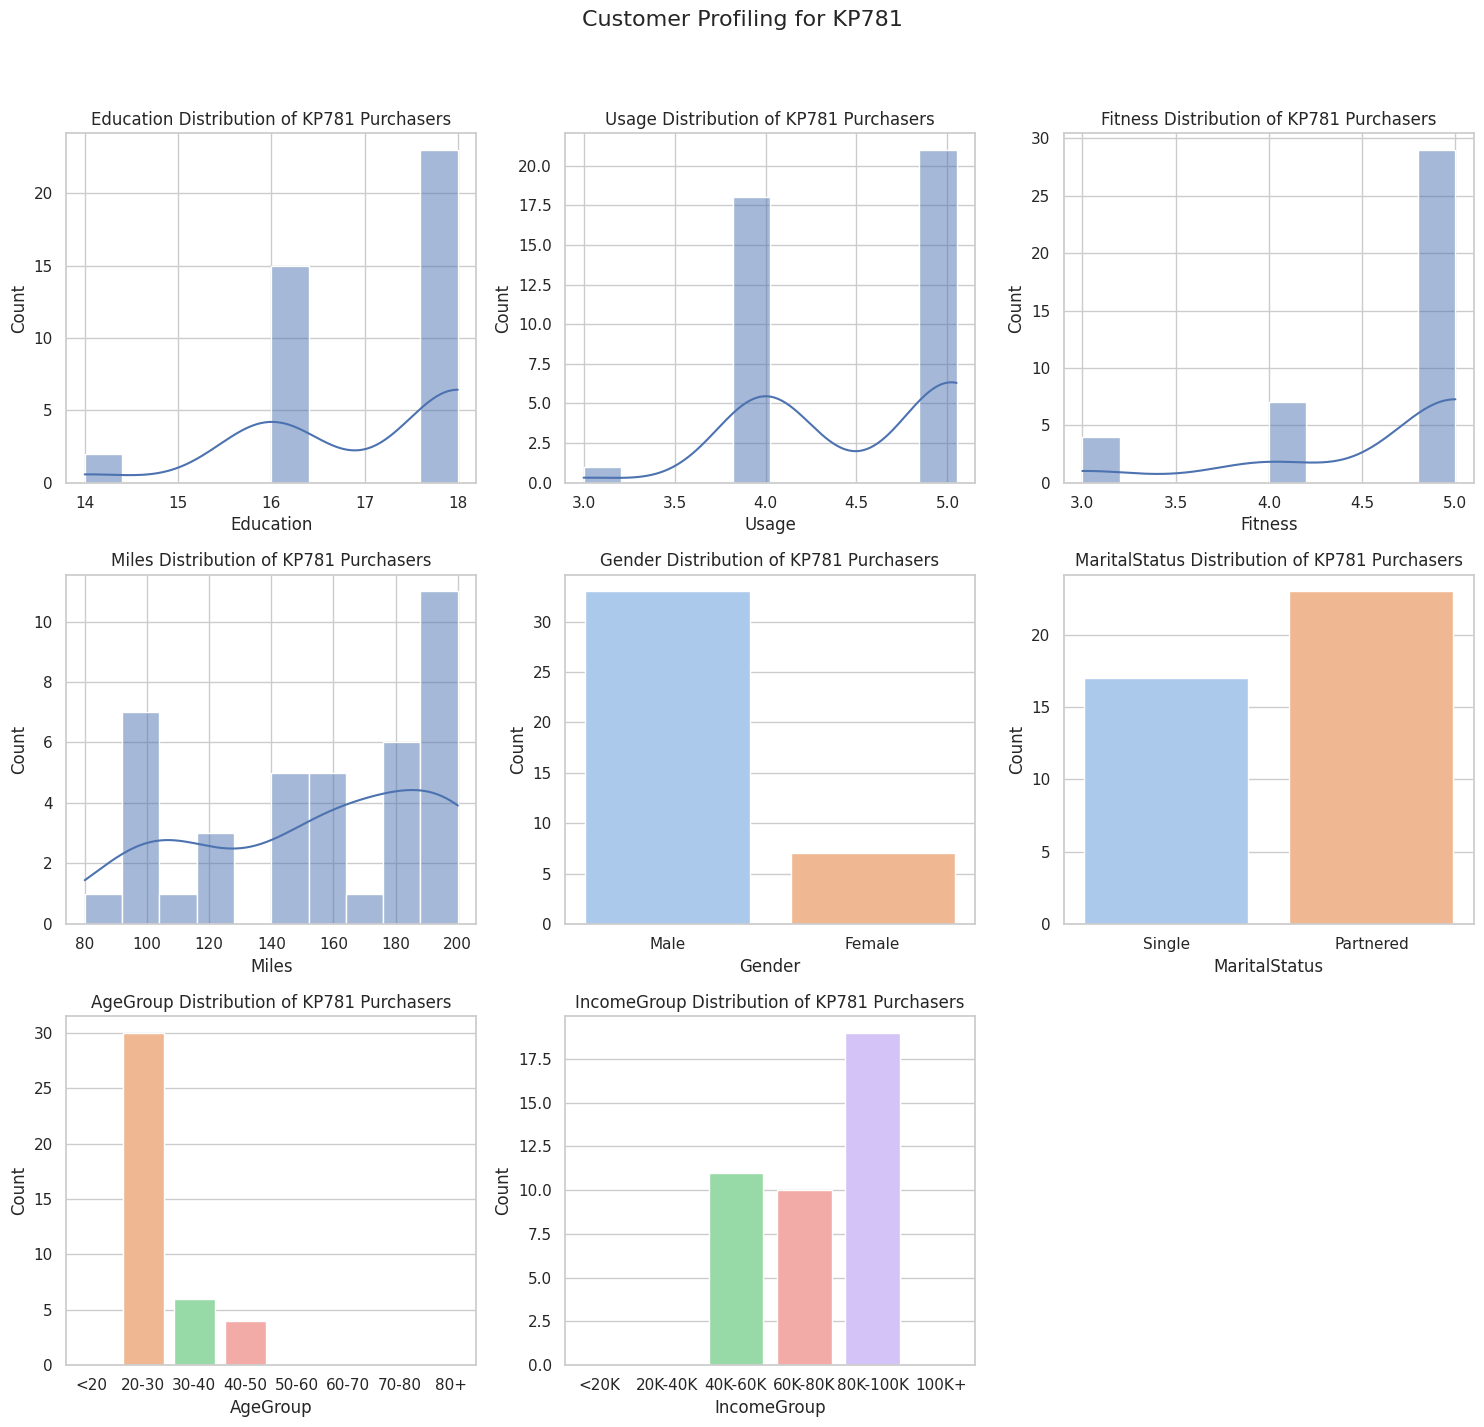

In [249]:
customer_profiling_product(df, "KP781")

###### **Inference:**
- **Demographic Inferences:**
  - Education: The majority of KP781 purchasers have completed 17 or 18 years of education, indicating a higher educational attainment compared to other product lines.
  - Age: The primary age group for KP781 purchasers is between 30-40 years, with a significant portion in the 40-50 age group.
  - Income: The income group of KP781 purchasers is predominantly in the higher brackets (60K-80K, 80K-100K, 100K+).
  - Gender: There's a slight preference towards male purchasers, but the distribution is relatively balanced.
  - Marital Status: A majority of KP781 purchasers are partnered.
  
- **Behavioral Inferences:**
  - Usage: Most customers use the treadmill 4-5 times per week, indicating a higher usage frequency compared to other products.
  - Fitness Level: The majority of purchasers have a high fitness level (4-5), suggesting a focus on advanced workouts.
  - Miles: The average distance covered per week is significantly higher (160-200 miles), reflecting the intense usage pattern.

- **Overall Inference:**
  The typical KP781 customer is a well-educated, high-income individual aged between 30-50, likely partnered, and highly dedicated to fitness. They utilize the treadmill extensively for demanding workouts.

###### **Recommendations:**
- Target Audience: Focus marketing efforts on professionals aged 30-50 with high incomes and a strong interest in fitness.
- Product Positioning: Position the KP781 as a premium product designed for serious athletes and fitness enthusiasts.
- Value Proposition: Emphasize advanced features, durability, and performance capabilities to justify the higher price point.
- Additional Features: Offer additional features like customizable workout programs, heart rate monitoring, and integration with fitness apps to cater to the target audience.
- Partnerships: Collaborate with fitness influencers or gyms to promote the product among the target demographic.


### **Overall Conclusion and Recommendation**

### **Recommendations - Actionable Items for Business:**

- **Segmentation-Based Marketing:**
  - Tailor marketing campaigns to the specific demographics of each product.
  - For KP281, focus on younger individuals with moderate income.
  - Target KP481 and KP781 marketing efforts towards older, higher-income customers.

- **Educational Content:**
  - Develop educational resources and content that resonate with well-educated customers.
  - Focus particularly on KP481 and KP781 purchasers who value high educational attainment.

- **Product Positioning:**
  - Position the KP781 as a premium product designed for fitness enthusiasts and professionals.
  - Emphasize advanced features, durability, and performance to appeal to serious athletes.
  - For KP481, highlight its suitability for regular users with moderate fitness goals.

- **Income-Specific Offers:**
  - Create pricing strategies and promotional offers that cater to the income levels of target customer groups.
  - Example: Offer financing plans or discounted bundles for KP481 to attract younger customers with moderate incomes.

- **Enhanced Customer Engagement:**
  - Build a strong community around the AeroFit brand by creating online forums, social media groups, and loyalty programs.
  - Engage with customers via newsletters, social media, and community events tailored to their fitness goals.

- **Customizable Features:**
  - Introduce customizable workout programs and additional features like heart rate monitoring.
  - Focus on the KP781 to cater to the needs of serious fitness enthusiasts who demand advanced features.

- **Partnerships with Fitness Centers:**
  - Collaborate with gyms, fitness influencers, and educational institutions.
  - Example: Partner with fitness centers to promote the KP781 among advanced users.
  - Consider co-branding opportunities or exclusive deals for members of partner organizations.

- **Loyalty and Referral Programs:**
  - Implement loyalty and referral programs to encourage repeat purchases and customer retention.
  - Example: Offer existing KP281 customers discounts on accessories or extended warranties.
  - Introduce an upgrade program where customers can trade in their old models for a discount on newer versions.

- **Bundled Offers:**
  - Offer bundled packages that include accessories, fitness programs, or extended warranties to increase perceived value.
  - Example: Provide bundled offers for KP281 and KP481 customers to enhance the overall value proposition.

- **Continuous Feedback Loop:**
  - Regularly collect and analyze customer feedback to improve product offerings and address customer pain points.
  - Use feedback to stay ahead of market trends and refine marketing strategies.

- **Community Building:**
  - Foster a sense of belonging and engagement among AeroFit customers by organizing fitness challenges, virtual meetups, and sharing success stories.
  - Encourage customers to share their fitness journeys using AeroFit products, boosting brand loyalty.

- **Expansion of Product Line:**
  - Consider expanding the product line to include specialized treadmills or fitness equipment.
  - Example: Develop high-performance models for athletes or entry-level models for beginners.

- **Promotional Strategies:**
  - Emphasize the affordability and value of the KP281 model in marketing campaigns to appeal to cost-conscious customers.
  - Example: Target KP281 promotions at younger customers with moderate income levels who are looking for a cost-effective fitness solution.

- **Targeted Online Campaigns:**
  - Use targeted online advertising to reach potential customers based on their age, income, and fitness interests.
  - Optimize ad spend for higher ROI by focusing on the demographics most likely to purchase each product line.

- **Customer Education:**
  - Provide guidance and resources to help customers achieve their fitness goals.
  - Reinforce the benefits of regular treadmill usage, particularly for KP481 and KP781 customers who are focused on long-term fitness.


### **Conclusion :**

The analysis of AeroFit's treadmill products reveals distinct customer profiles for each product line, highlighting differences in demographics, income levels, fitness habits, and usage patterns. The KP281 is popular among younger, moderately educated individuals with moderate income levels, whereas the KP481 attracts a slightly older audience with higher educational attainment and income. The KP781, positioned as a premium product, is favored by highly educated, high-income individuals who are serious about their fitness routines. These insights provide valuable guidance for tailoring marketing strategies, product development, and customer engagement to better meet the needs of each segment.